<a href="https://colab.research.google.com/github/praneeth-05/Assignment-Python-Final./blob/main/POWER_GENERATION1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
%matplotlib inline
sns.set(font_scale=1.5)

#IMPORTING DATA

In [ ]:
data=pd.read_csv('PowerGeneration.csv',header=0)
data

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0


#UNDERSTANDING THE DATA

In [ ]:
data.isna().sum()  #to check null values

Dates                               0
Power Station                       0
Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
Programme or Expected(MU)           0
Actual(MU)                          0
Excess(+) / Shortfall (-)           0
Deviation                           0
dtype: int64

In [ ]:
np.mean(data["Deviation"])

0.2964241918713597

In [ ]:
data["Deviation"]=data["Deviation"].fillna(np.mean(data["Deviation"]))

In [ ]:
data.isna().sum()

Dates                               0
Power Station                       0
Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
Programme or Expected(MU)           0
Actual(MU)                          0
Excess(+) / Shortfall (-)           0
Deviation                           0
dtype: int64

In [ ]:
data.shape

(345273, 11)

In [ ]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].unique())

['2017-09-01' '2017-09-02' '2017-09-03' ... '2022-04-11' '2022-04-12'
 '2022-04-13']
['Delhi' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Punjab'
 'Rajasthan' 'Uttarakhand' 'Uttar Pradesh' 'ADHPL' 'AHPC (GVK)' 'APCPL'
 'APL' 'BEPL' 'DAE' 'E.P.P.L.' 'GBHPPL' 'GIPL' 'GPGSL (GVK)' 'HBPCL'
 'HSPCL' 'IAEPL' 'JhPL(HR)' 'JPPVL' 'LAPPL' 'LPGCL' 'MPCL' 'MUNPL' 'NDPL'
 'NHPC' 'NLC' 'NPCIL' 'NPL' 'NTPC Ltd.' 'NTPGPL' 'PPGCL (Jaypee)' 'RPSCL'
 'RWPL (JSW)' 'SJVNL' 'SrEPL' 'THDC' 'TSPL' 'Chhatisgarh' 'Gujarat'
 'Madhya Pradesh' 'Maharashtra' 'ACB' 'AMNEPL' 'BALCO' 'BLAPPL' 'CGPL'
 'CLPINDIA' 'DBPCL' 'DIPL' 'DLHP' 'EPGL' 'ESSAR' 'ESSARPMPL' 'GCEL' 'GEPL'
 'GIPCL' 'GMR ENERG' 'IEPL' 'JHAPL' 'JPL' 'JSWEL' 'KWPCL' 'LANCO' 'LVTPL'
 'MBPMPL' 'MCCPL' 'NHDC' 'NSPCL' 'PGPL' 'RATTANINDIA' 'RELIANCE' 'RGPPL'
 'RIL (DAHANU)' 'RKMPPL' 'SCPL' 'SKS' 'SMHPCL' 'SPL' 'SVPPL' 'TATA MAH.'
 'TATA PCL' 'TOR. POW. (SUGEN)' 'TOR. POW. (UNOSUGEN)' 'TRNE' 'VESPL'
 'VIP' 'VVL' 'WPCL' 'Andhra Pradesh' 'Karnataka' 'Keral

In [ ]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].value_counts())

2020-03-18    13050
2018-04-02      528
2017-11-25      352
2022-04-13      182
2022-09-14      182
              ...  
2019-07-18      173
2019-06-30      173
2019-06-12      173
2019-05-25      172
2019-05-07      172
Name: Dates, Length: 1857, dtype: int64
NTPC Ltd.          9570
NHPC               5742
NPCIL              5742
GMR ENERG          5742
JSWEL              3828
                   ... 
Andhra Pradesh.     320
PVUNL               210
DPSCLTD             192
TPCIL               172
IEL                 172
Name: Power Station, Length: 182, dtype: int64
1200.0    23809
600.0     21959
0.0       21024
300.0      8174
100.0      6249
          ...  
1577.0        6
6568.1        5
720.0         4
4795.0        2
1967.1        1
Name: Monitored Cap.(MW), Length: 241, dtype: int64
0.00       140679
600.00      13997
300.00      11683
220.00       6990
660.00       6470
            ...  
4462.72         1
1873.00         1
5393.59         1
4252.72         1
1223.20         1
Nam

In [ ]:
data.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


#DATA CLEANING

In [ ]:
data.Dates = pd.to_datetime(data.Dates)
data[['Year','Month','Day']] = data.Dates.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
data

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Year,Month,Day
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,2017,09,01
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,2017,09,01
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,2017,09,01
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,2017,09,01
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,2017,09,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,2022,04,13
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,2022,04,13
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,2022,04,13
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,2022,04,13


In [ ]:
data['Dates'] = data['Dates'].astype('int')

In [ ]:
data['Year'] = data['Year'].astype('int')

In [ ]:
data['Month'] = data['Month'].astype('int')

In [ ]:
data['Day'] = data['Day'].astype('int')

In [ ]:
Z = data[data['Power Station'].apply(lambda x: str(x).isdigit())]

In [ ]:
power_station_map = {station: i for i, station in enumerate(data['Power Station'].unique())}
data['Power Station'] = data['Power Station'].map(power_station_map)

In [ ]:
print(data.dtypes)

Dates                                 int64
Power Station                         int64
Monitored Cap.(MW)                  float64
Total Cap. Under Maintenace (MW)    float64
Planned Maintanence (MW)            float64
Forced Maintanence(MW)              float64
Other Reasons (MW)                    int64
Programme or Expected(MU)             int64
Actual(MU)                            int64
Excess(+) / Shortfall (-)           float64
Deviation                           float64
Year                                  int64
Month                                 int64
Day                                   int64
dtype: object


In [ ]:
data.shape

(345273, 14)

<Axes: >

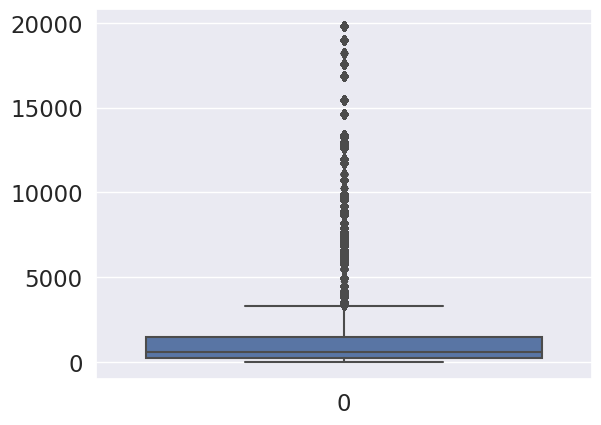

In [ ]:
sns.boxplot(data['Monitored Cap.(MW)'])

In [ ]:
q3 = data['Monitored Cap.(MW)'].quantile(.75)
q1 = data['Monitored Cap.(MW)'].quantile(.25)
iqr = q3-q1
iqr

1250.0

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Monitored Cap.(MW)']>bottomrange) & (data['Monitored Cap.(MW)']<upperrange)]

<Axes: >

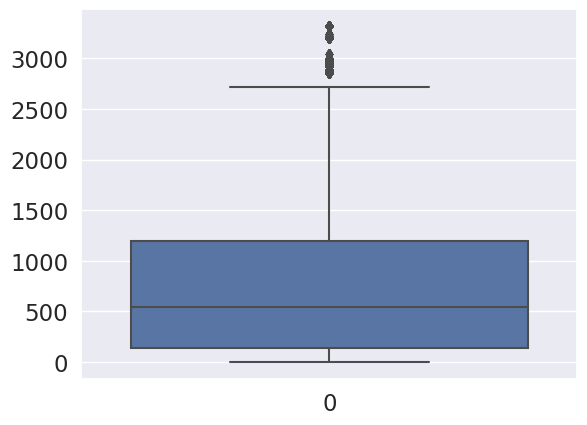

In [ ]:
sns.boxplot(data['Monitored Cap.(MW)'])

<Axes: >

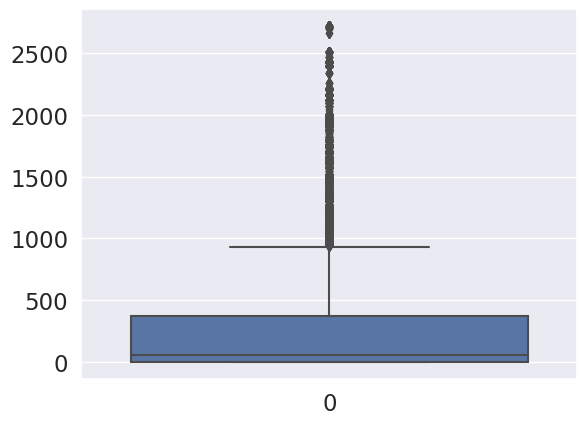

In [ ]:
sns.boxplot(data['Total Cap. Under Maintenace (MW)'])

In [ ]:
q3 = data['Total Cap. Under Maintenace (MW)'].quantile(.75)
q1 = data['Total Cap. Under Maintenace (MW)'].quantile(.25)
iqr = q3-q1
iqr

375.0

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Total Cap. Under Maintenace (MW)']>bottomrange) & (data['Total Cap. Under Maintenace (MW)']<upperrange)]

<Axes: >

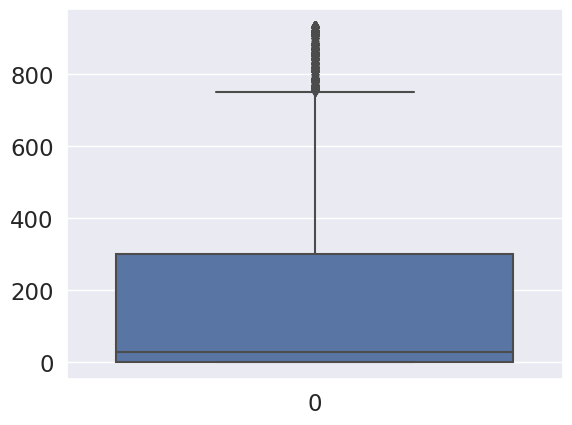

In [ ]:
sns.boxplot(data['Total Cap. Under Maintenace (MW)'])

<Axes: >

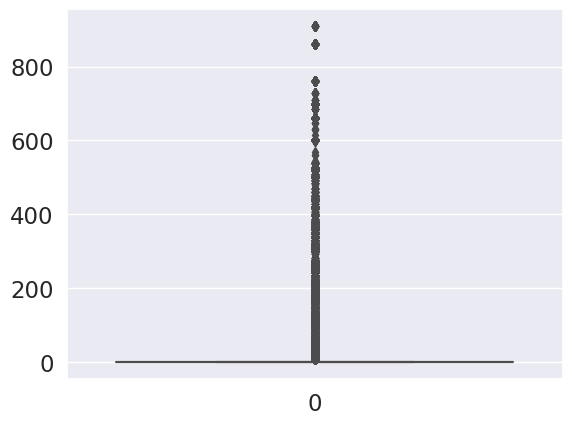

In [ ]:
sns.boxplot(data['Planned Maintanence (MW)'])

<Axes: >

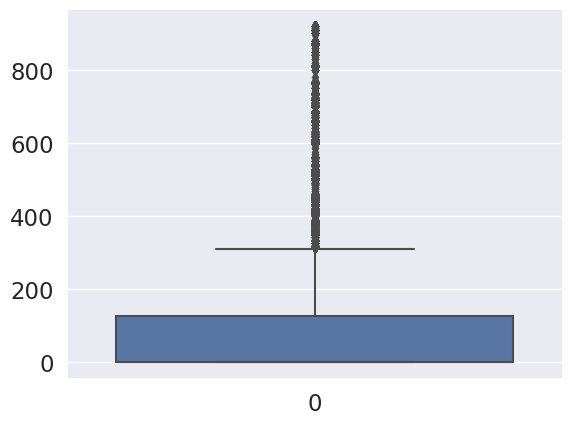

In [ ]:
sns.boxplot(data['Forced Maintanence(MW)'])

<Axes: >

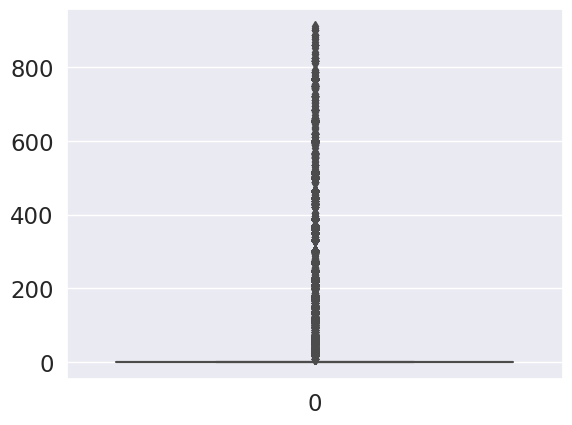

In [ ]:
sns.boxplot(data['Other Reasons (MW)'])

<Axes: >

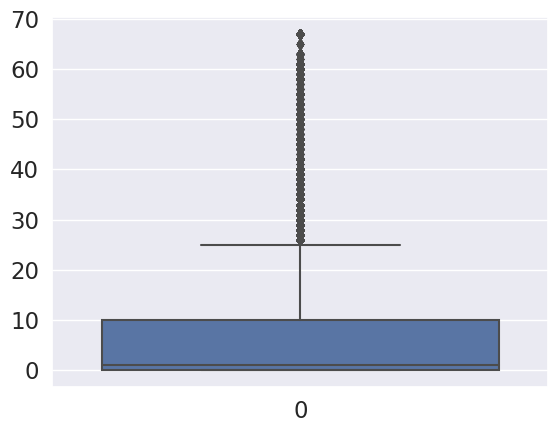

In [ ]:
sns.boxplot(data['Programme or Expected(MU)'])

<Axes: >

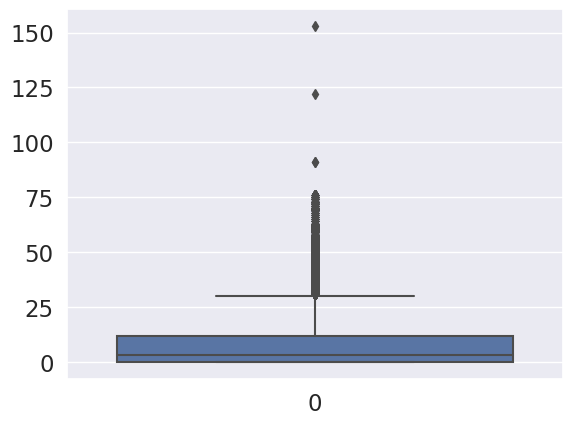

In [ ]:
sns.boxplot(data['Actual(MU)'])

<Axes: >

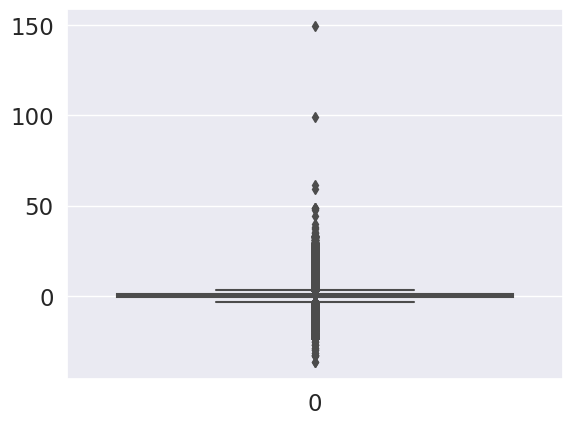

In [ ]:
sns.boxplot(data['Excess(+) / Shortfall (-)'])

<Axes: >

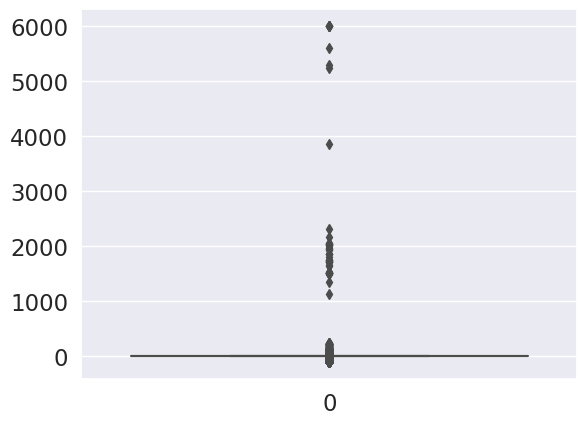

In [ ]:
sns.boxplot(data['Deviation'])

#EXPLORATORY DATA ANALYSIS (EDA)

##KDE Plot

In [ ]:
len(data['Power Station'].unique())

In [ ]:
data['Power Station'].value_counts()

In [ ]:
data['Monitored Cap.(MW)'].value_counts()

600.0     21959
0.0       21024
1200.0    19797
300.0      8174
100.0      6249
          ...  
2700.0        6
1577.0        6
2220.0        6
1944.5        5
720.0         4
Name: Monitored Cap.(MW), Length: 155, dtype: int64

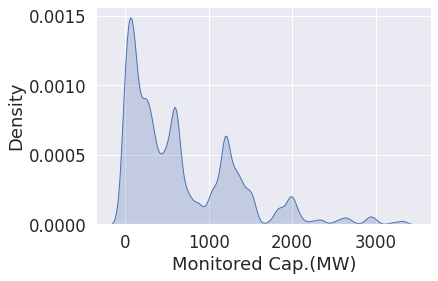

In [ ]:
sns.kdeplot(data['Monitored Cap.(MW)'],shade=True);

In [ ]:
data['Total Cap. Under Maintenace (MW)'].value_counts()

0.00      138513
600.00     13870
300.00     11664
220.00      6972
660.00      5571
           ...  
144.18         1
124.18         1
622.50         1
473.00         1
119.08         1
Name: Total Cap. Under Maintenace (MW), Length: 1447, dtype: int64

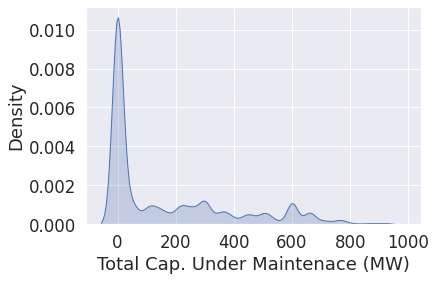

In [ ]:
sns.kdeplot(data['Total Cap. Under Maintenace (MW)'],shade=True);

In [ ]:
data['Planned Maintanence (MW)'].value_counts()

0.00      255489
250.00      1858
600.00      1191
300.00      1105
150.00      1027
           ...  
430.00         1
241.55         1
413.00         1
70.00          1
102.50         1
Name: Planned Maintanence (MW), Length: 348, dtype: int64

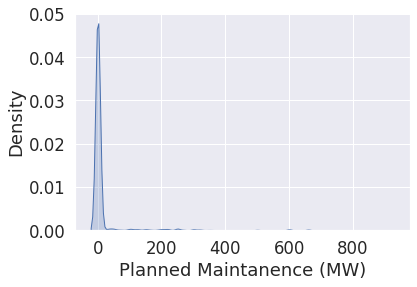

In [ ]:
sns.kdeplot(data['Planned Maintanence (MW)'],shade=True);

In [ ]:
data['Forced Maintanence(MW)'].value_counts()

0.00      192027
600.00     12231
300.00     10468
660.00      4440
270.00      4204
           ...  
406.60         1
410.60         1
114.14         1
234.00         1
780.00         1
Name: Forced Maintanence(MW), Length: 525, dtype: int64

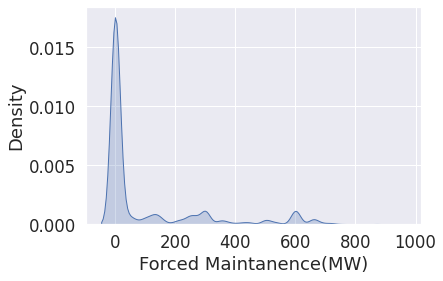

In [ ]:
sns.kdeplot(data['Forced Maintanence(MW)'],shade=True);

In [ ]:
data['Other Reasons (MW)'].value_counts()

0      269066
220       940
48        424
135       390
225       361
        ...  
841         1
332         1
883         1
176         1
219         1
Name: Other Reasons (MW), Length: 252, dtype: int64

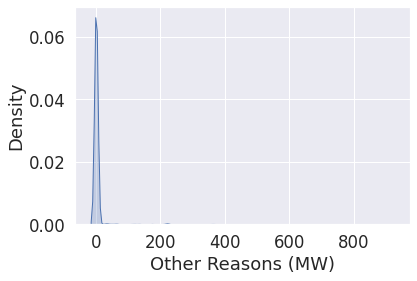

In [ ]:
sns.kdeplot(data['Other Reasons (MW)'],shade=True);

In [ ]:
data['Programme or Expected(MU)'].value_counts()

0     133774
1      16418
10      9305
2       8936
4       8266
       ...  
56        71
43        59
62        40
41        31
65        19
Name: Programme or Expected(MU), Length: 66, dtype: int64

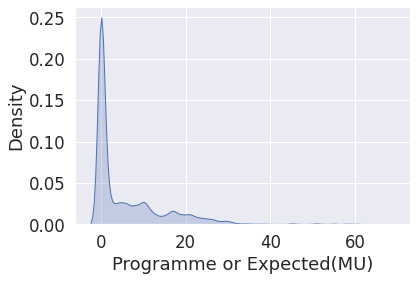

In [ ]:
sns.kdeplot(data['Programme or Expected(MU)'],shade=True);

In [ ]:
data['Actual(MU)'].value_counts()

0      116101
1       12291
2       10931
4        9150
6        7867
        ...  
76         23
67         16
91          2
122         1
153         1
Name: Actual(MU), Length: 80, dtype: int64

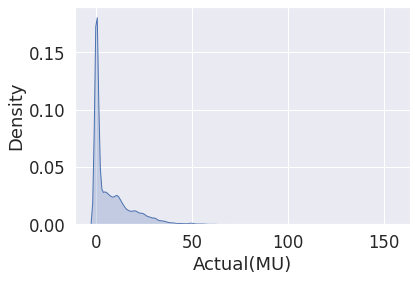

In [ ]:
sns.kdeplot(data['Actual(MU)'],shade=True);

In [ ]:
data['Excess(+) / Shortfall (-)'].value_counts()

 0.00     74288
-0.06      1448
-0.26      1176
-0.13      1016
-0.04      1014
          ...  
 23.24        1
 28.60        1
 29.29        1
 23.71        1
 23.61        1
Name: Excess(+) / Shortfall (-), Length: 4483, dtype: int64

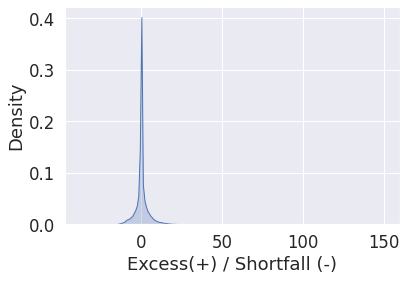

In [ ]:
sns.kdeplot(data['Excess(+) / Shortfall (-)'],shade=True);

In [ ]:
data['Deviation'].value_counts()

 0.00      275472
-100.00       767
-10.00         30
 7.69          25
 11.11         24
            ...  
-35.74          1
-21.36          1
-7.39           1
 79.23          1
 7.12           1
Name: Deviation, Length: 3479, dtype: int64

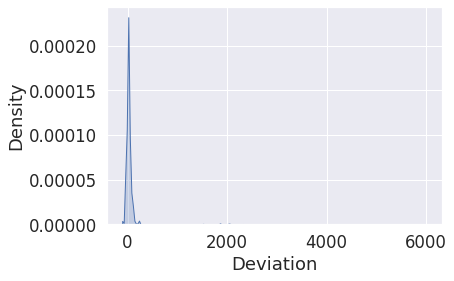

In [ ]:
sns.kdeplot(data['Deviation'],shade=True);

##PAIR PLOT

##BAR PLOT

In [ ]:
data['Power Station'].value_counts()

60     5742
30     4574
108    3828
28     3828
64     3828
       ... 
158     192
143     172
124     166
86       37
75       20
Name: Power Station, Length: 166, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Power Station'>

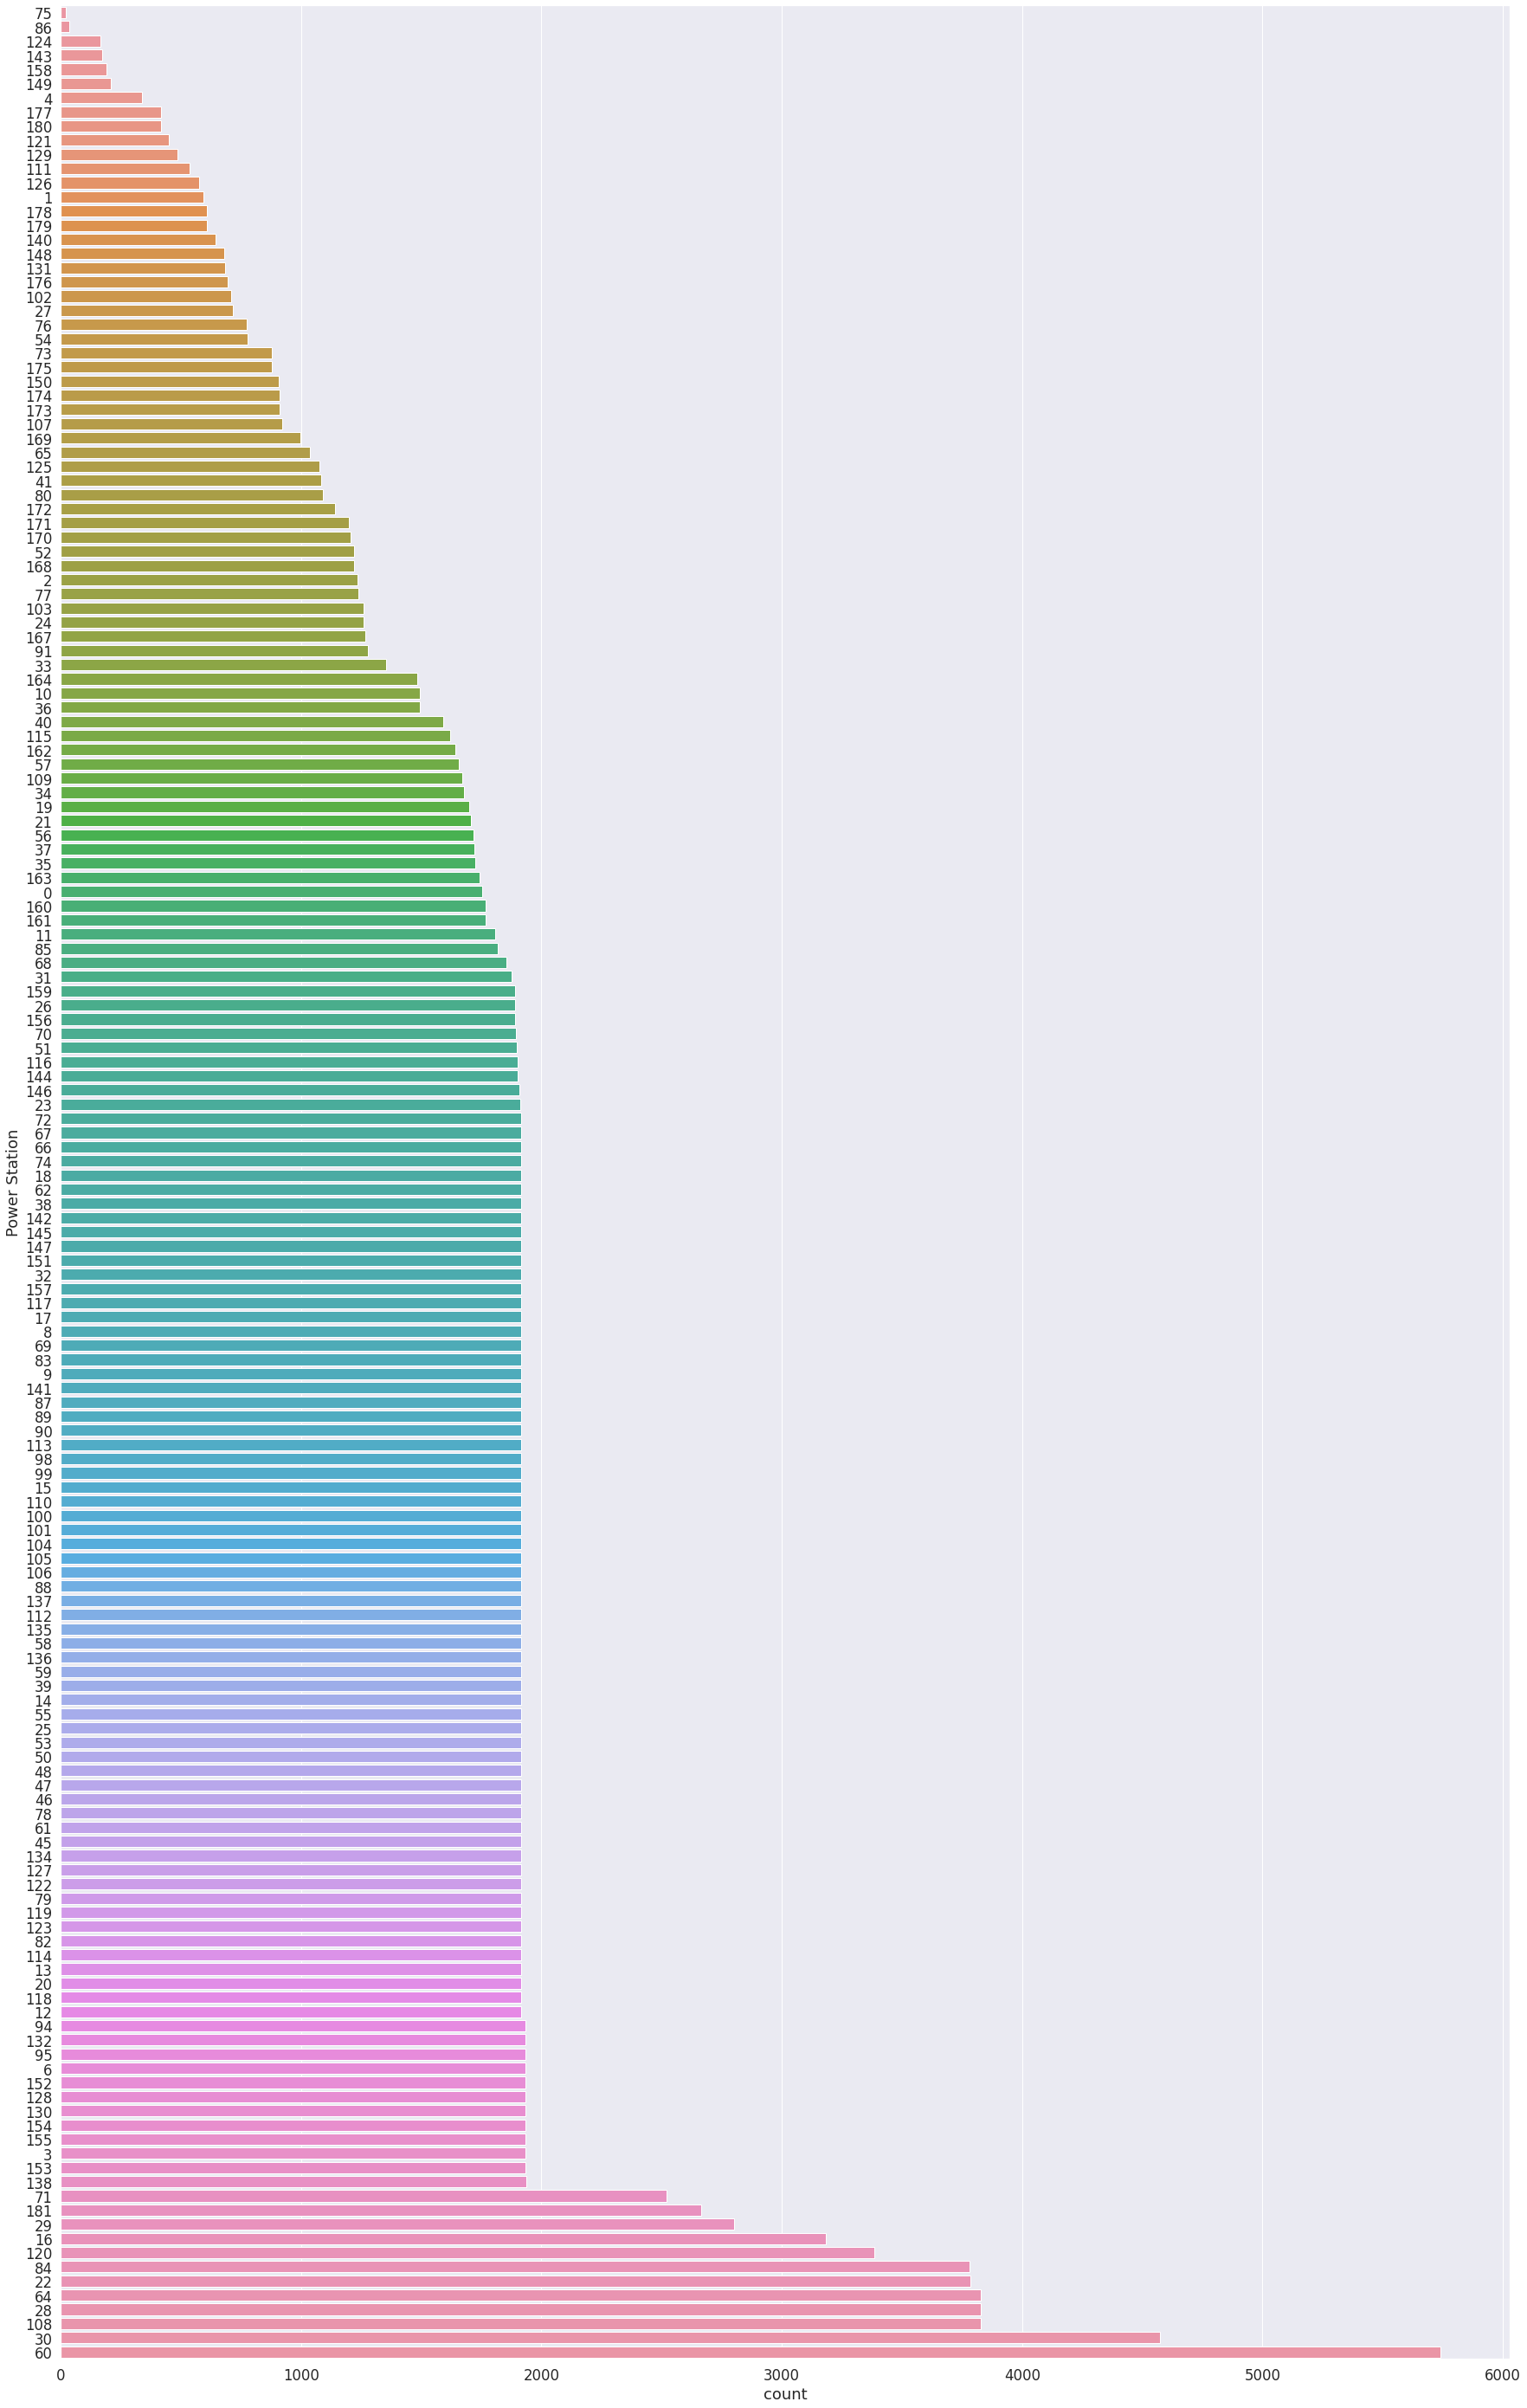

In [ ]:
plt.figure(figsize = (30,50))
sns.countplot(y='Power Station',data=data,order=data['Power Station'].value_counts().sort_values().index)

In [ ]:
a = data.groupby('Power Station')['Monitored Cap.(MW)'].mean()
a

Power Station
0      2158.202166
1      2583.411765
2       838.696602
3      1285.000000
4      2731.860651
          ...     
177    1080.000000
178       0.000000
179     311.718750
180     600.000000
181     638.534276
Name: Monitored Cap.(MW), Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

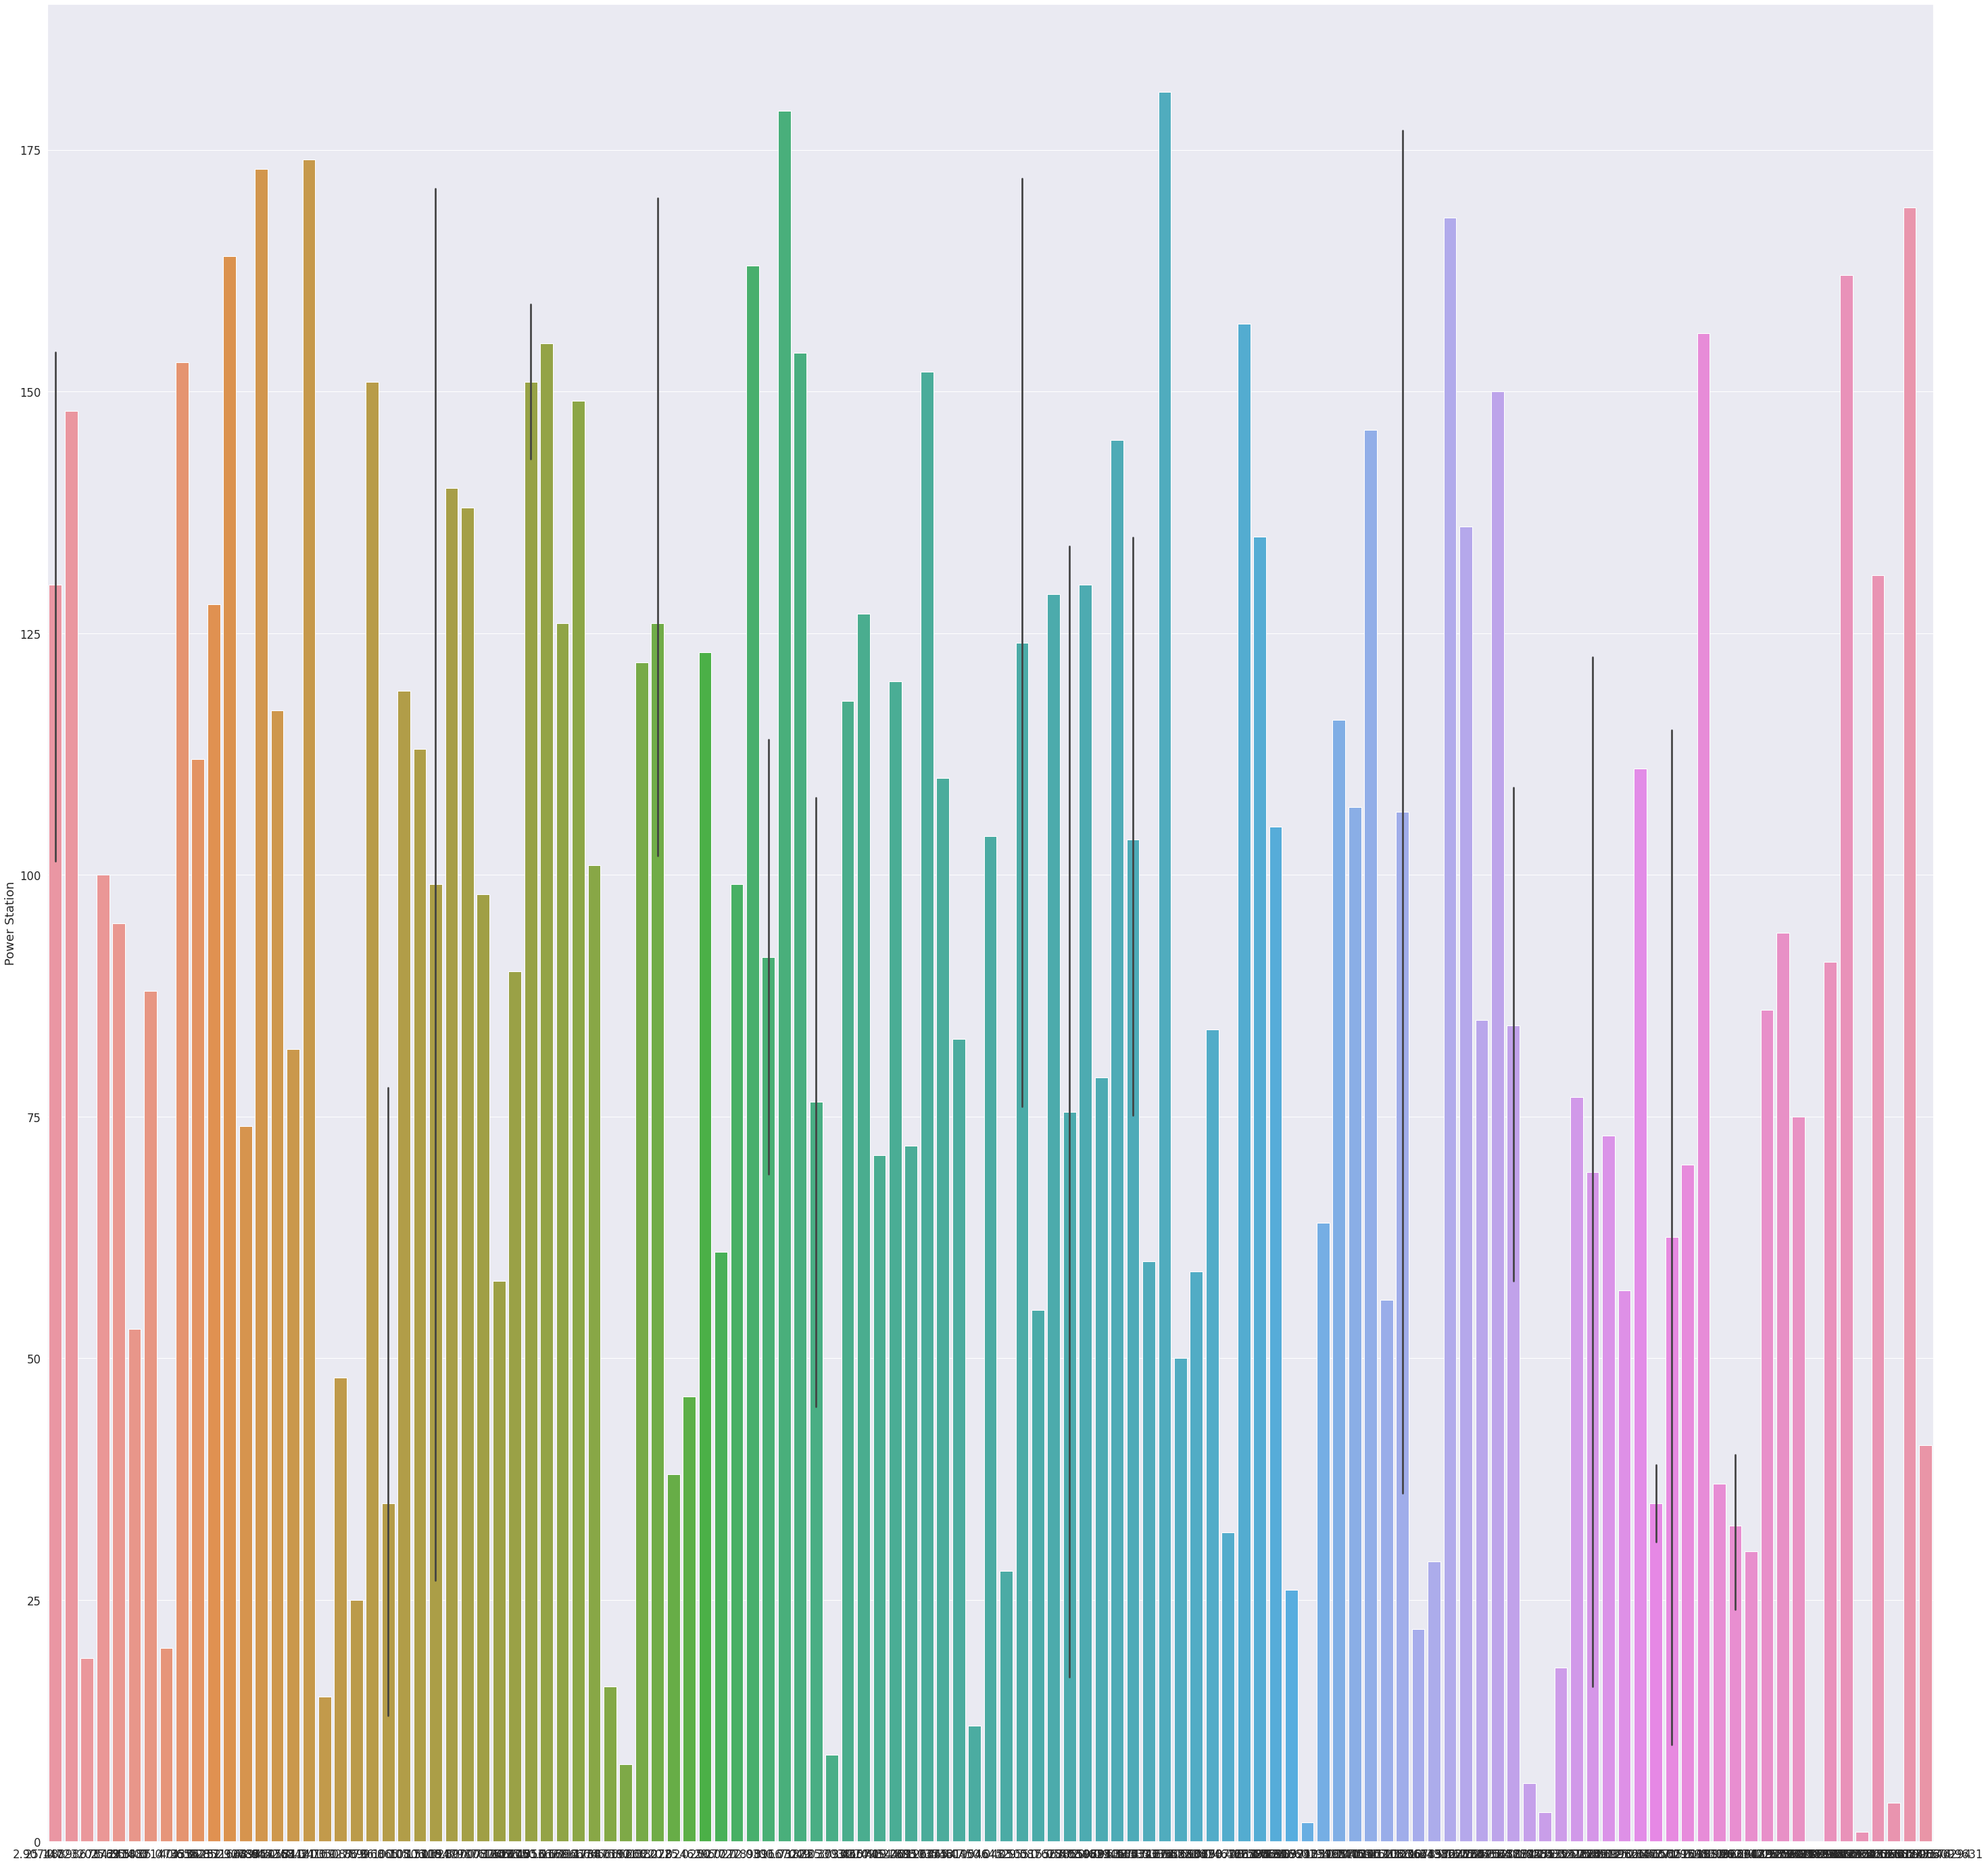

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=a.values,y=a.index)

In [ ]:
b = data.groupby('Power Station')['Total Cap. Under Maintenace (MW)'].mean()
b

Power Station
0      751.186317
1      521.159664
2      149.650890
3      330.646329
4      538.643491
          ...    
177    212.374101
178      0.000000
179    125.205592
180     99.043062
181    177.151039
Name: Total Cap. Under Maintenace (MW), Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

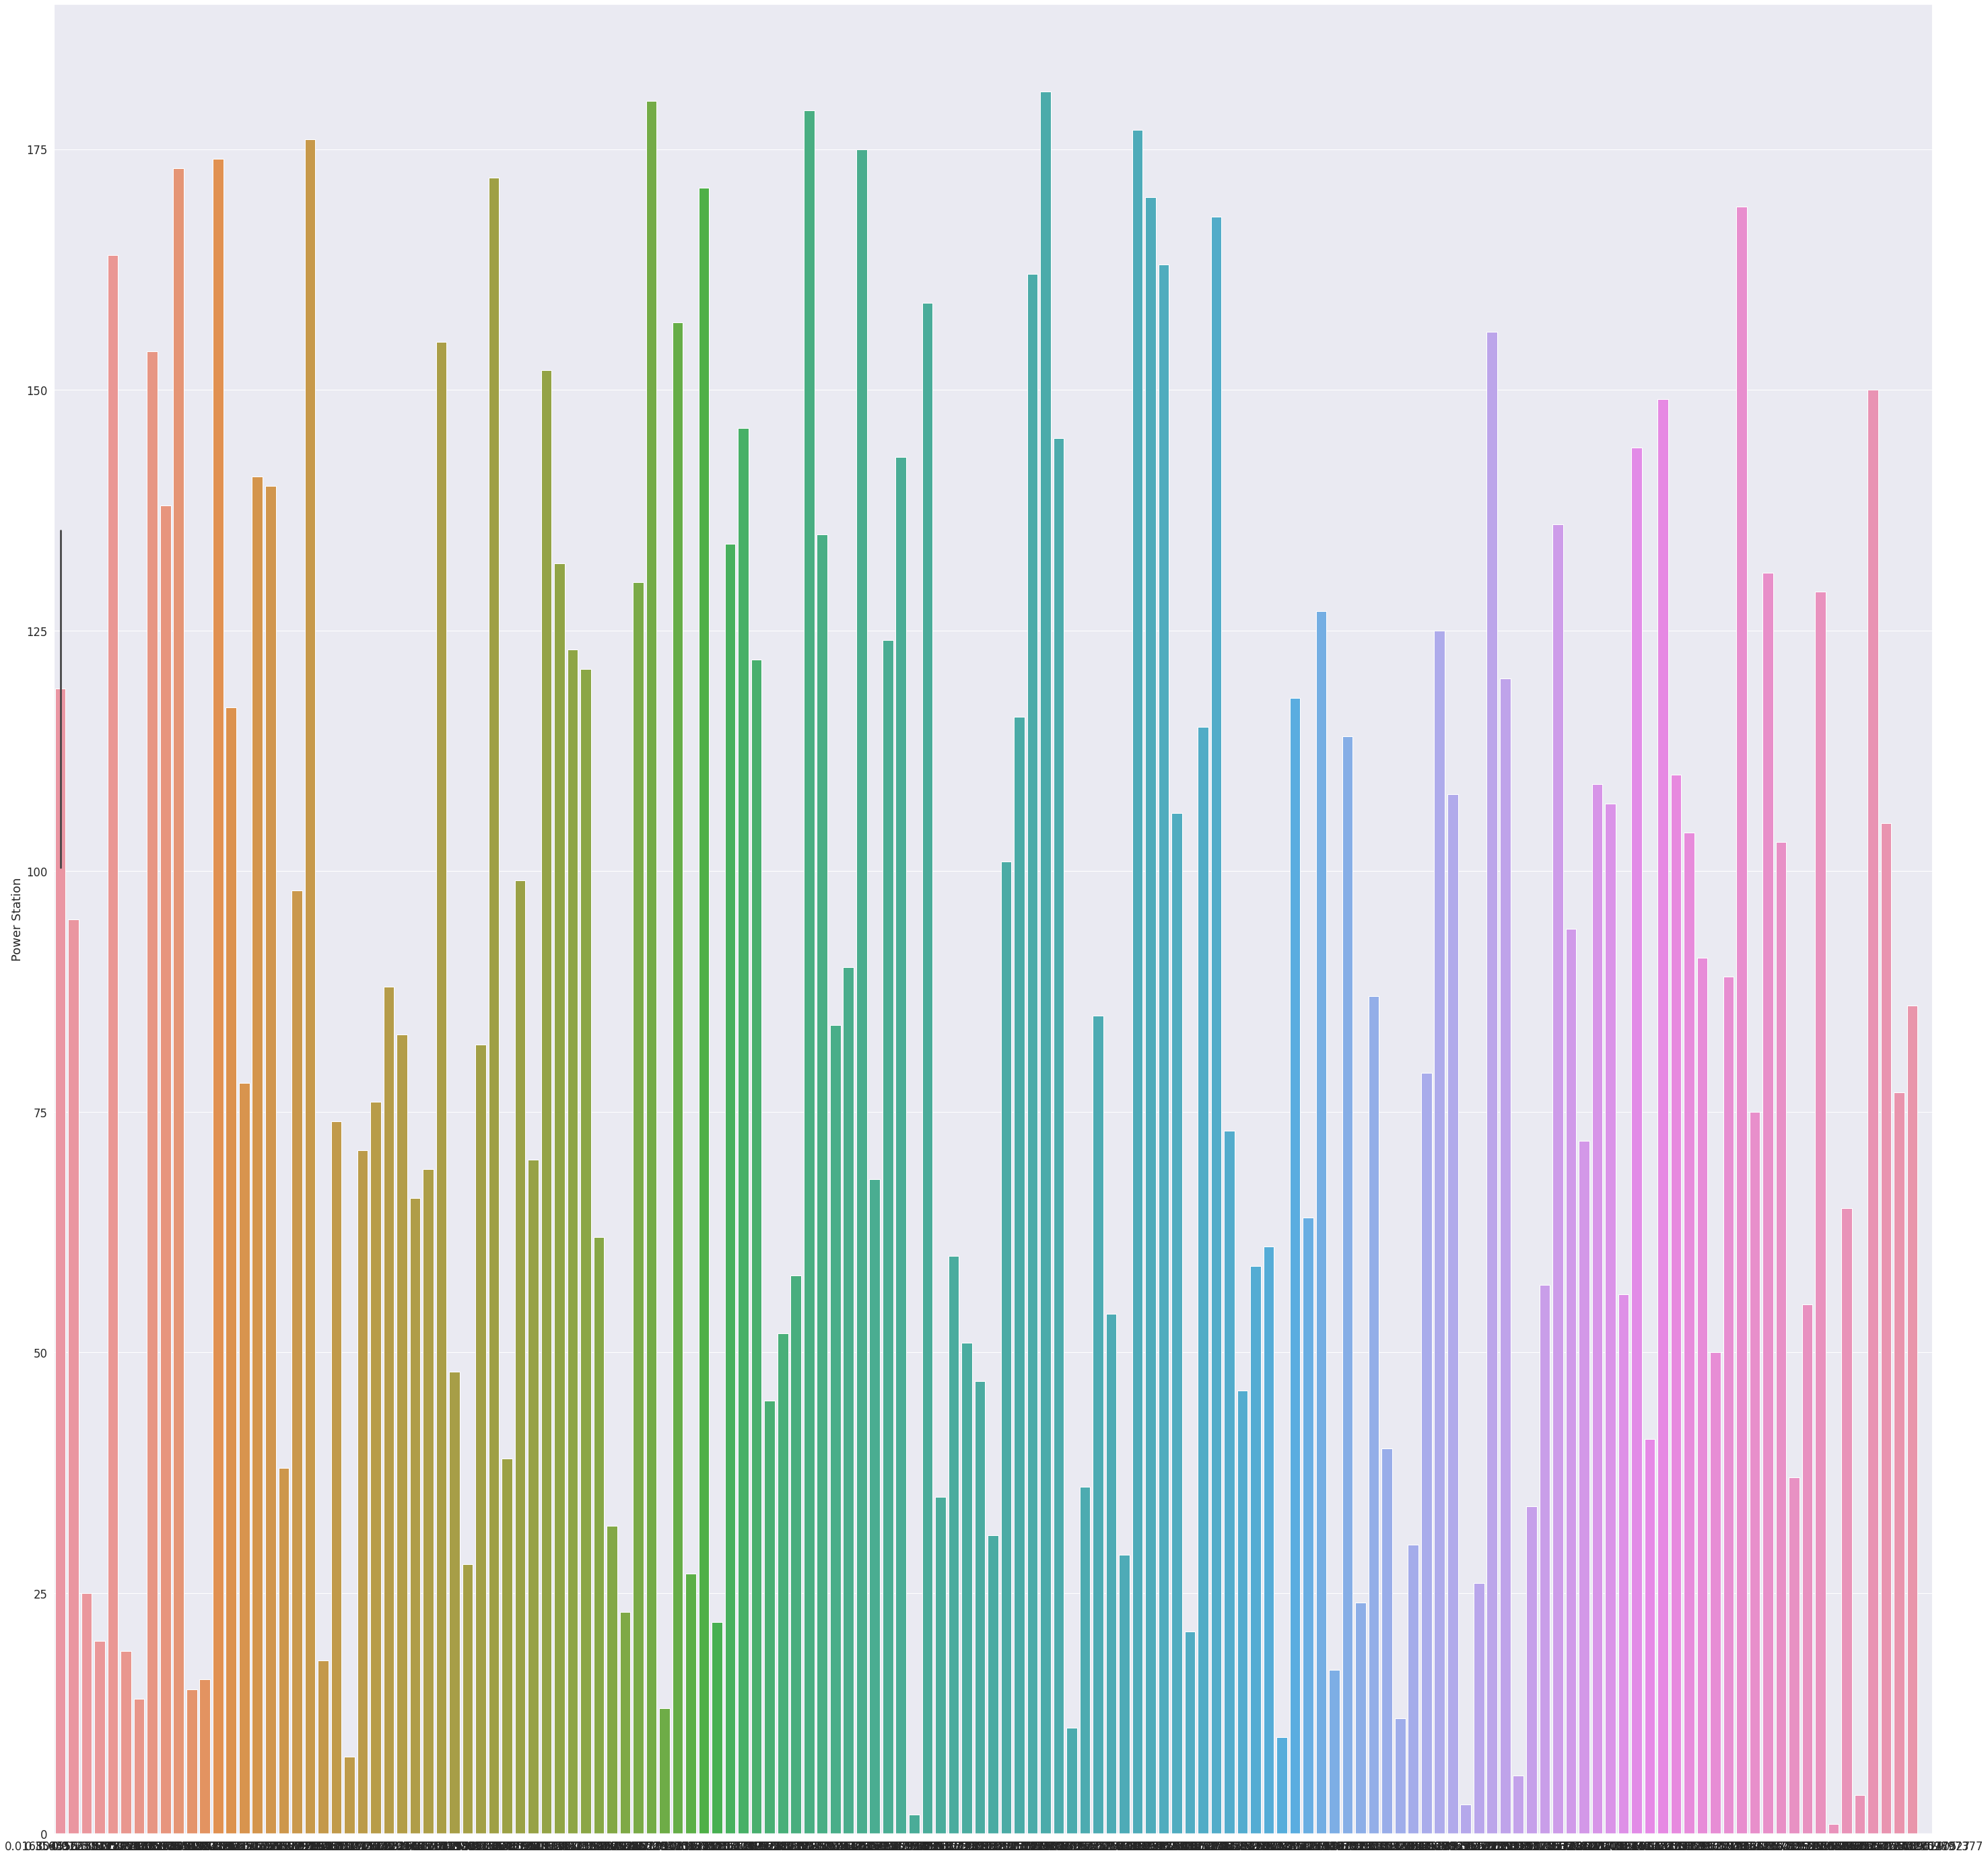

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=b.values,y=b.index)

In [ ]:
c = data.groupby('Power Station')['Planned Maintanence (MW)'].mean()
c

Power Station
0       3.229761
1      81.680672
2      33.214806
3      18.304033
4      65.118343
         ...    
177    13.273381
178     0.000000
179     0.000000
180     0.000000
181    13.248687
Name: Planned Maintanence (MW), Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

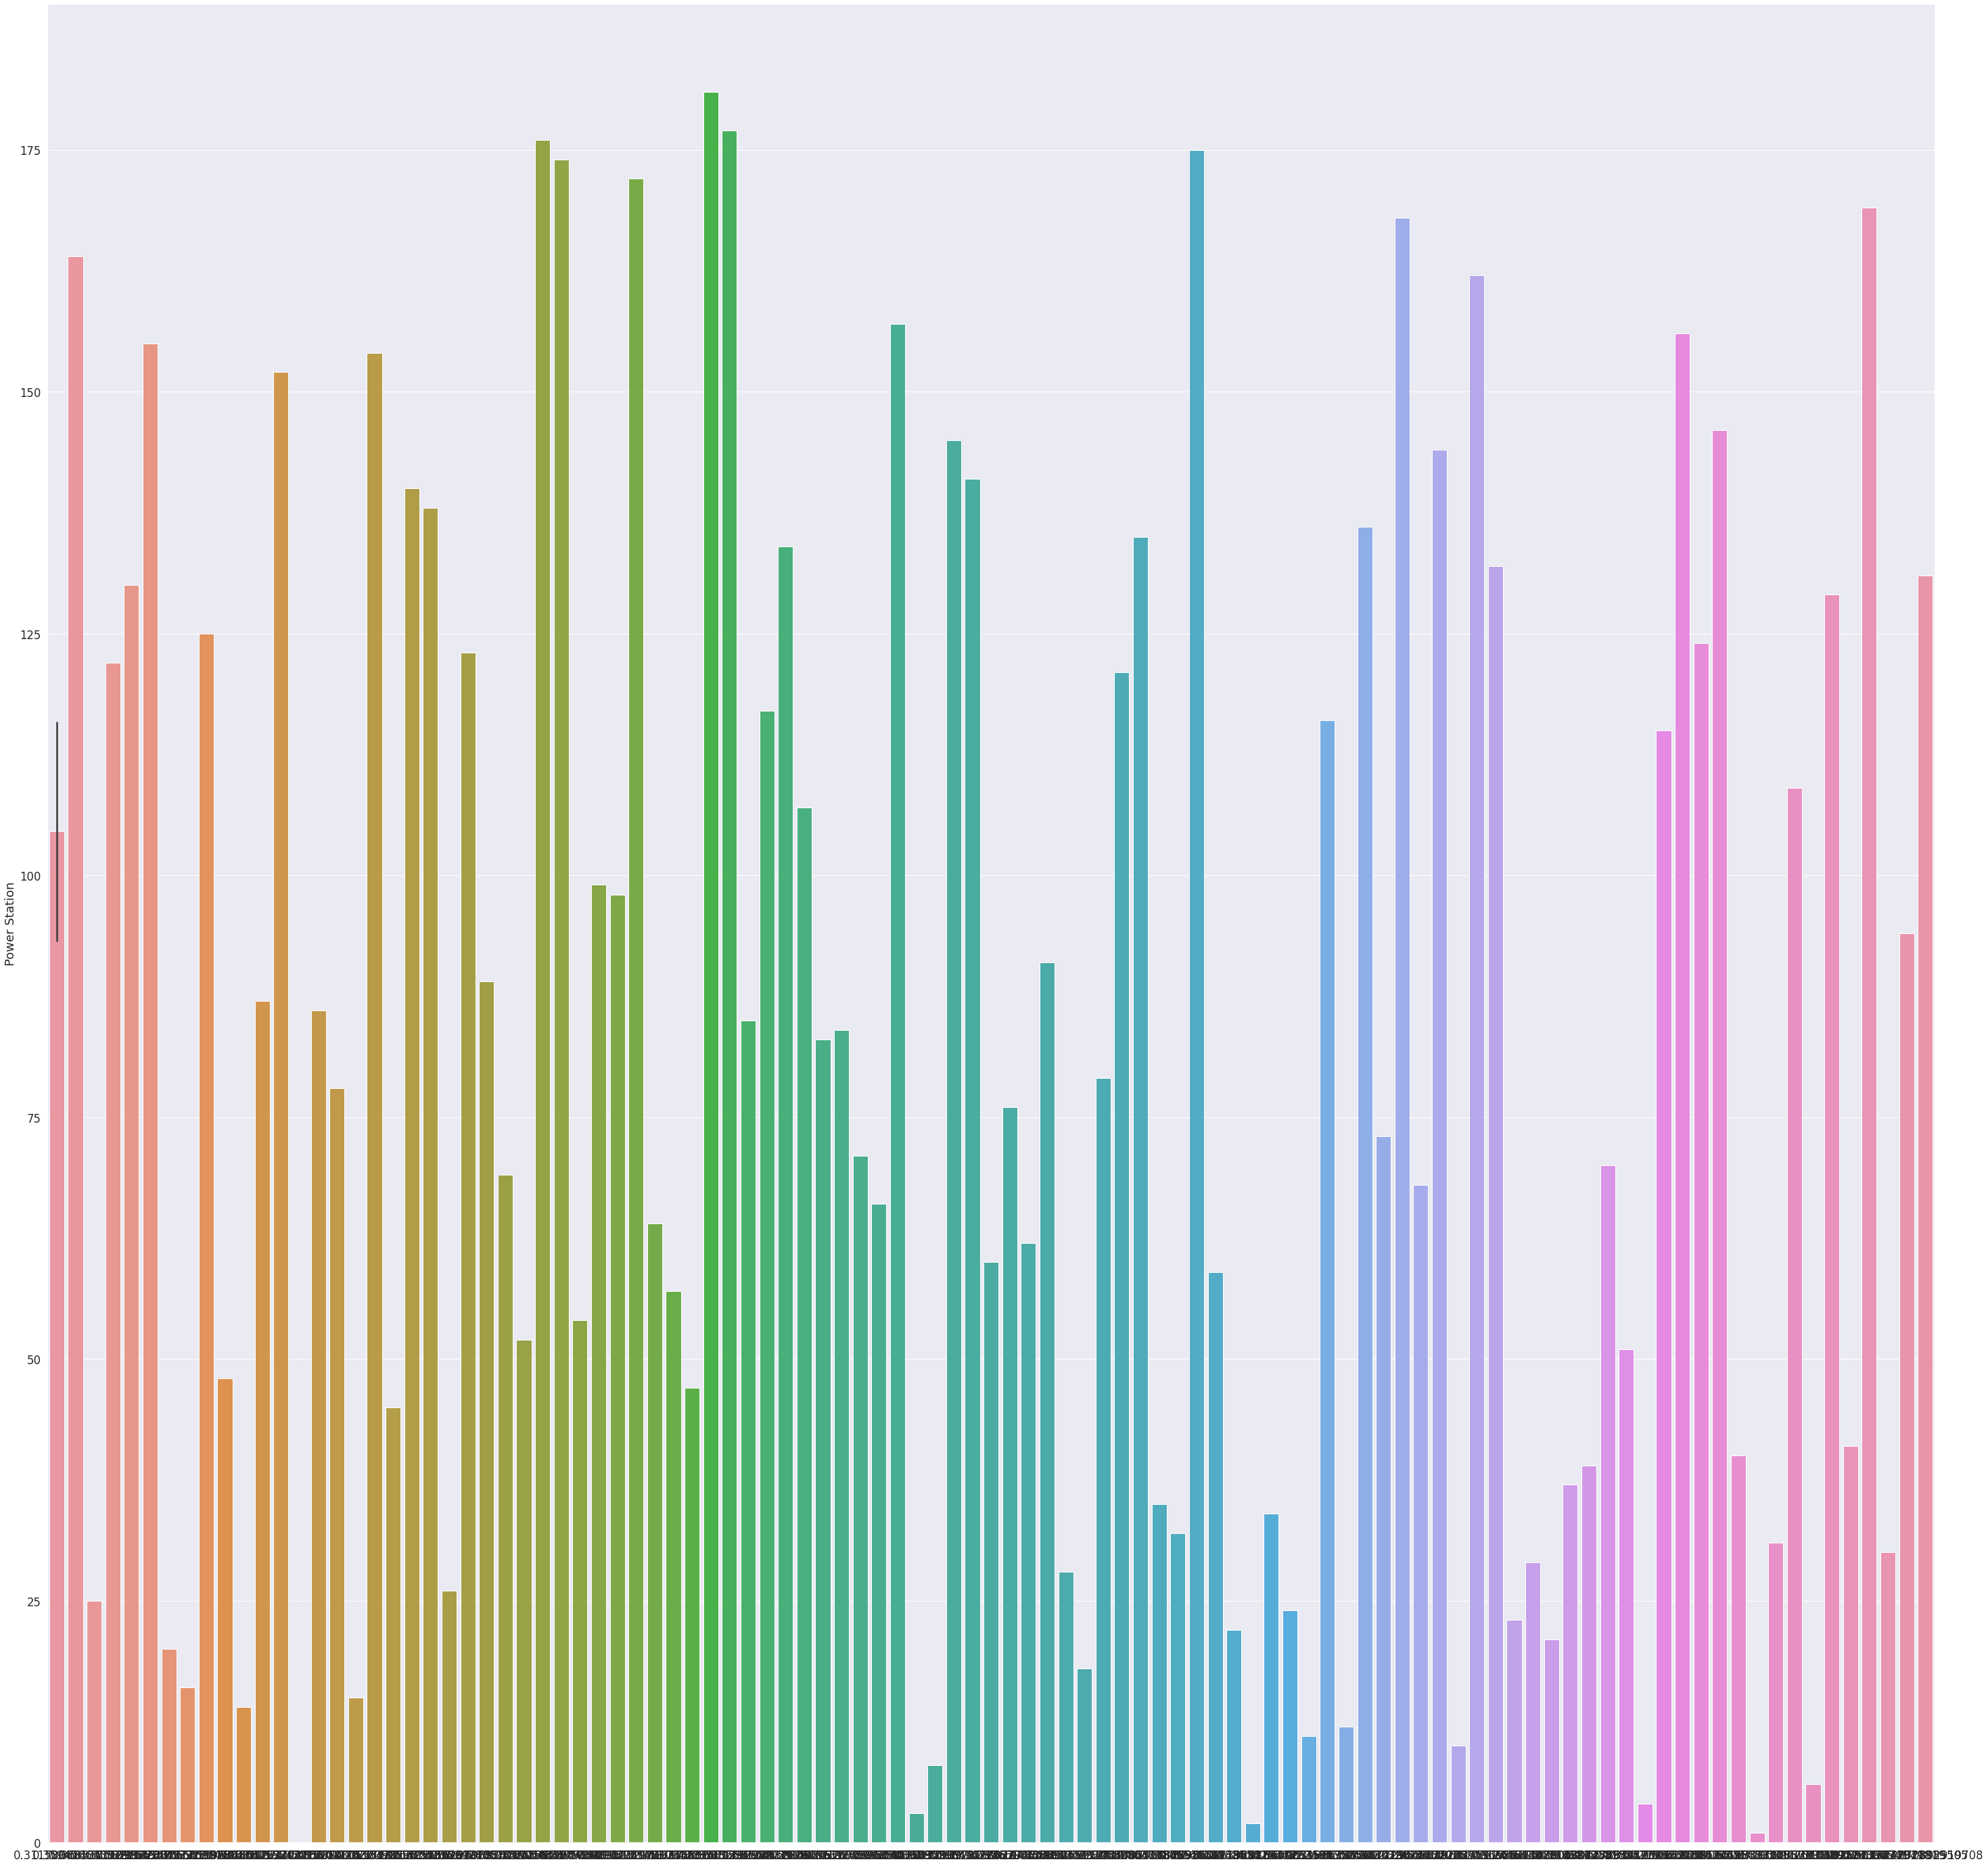

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=c.values,y=c.index)

In [ ]:
d = data.groupby('Power Station')['Forced Maintanence(MW)'].mean()
d

Power Station
0      206.825428
1      437.966387
2        5.078479
3        5.736815
4      452.778107
          ...    
177    199.100719
178      0.000000
179    124.342105
180     99.043062
181    114.757941
Name: Forced Maintanence(MW), Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

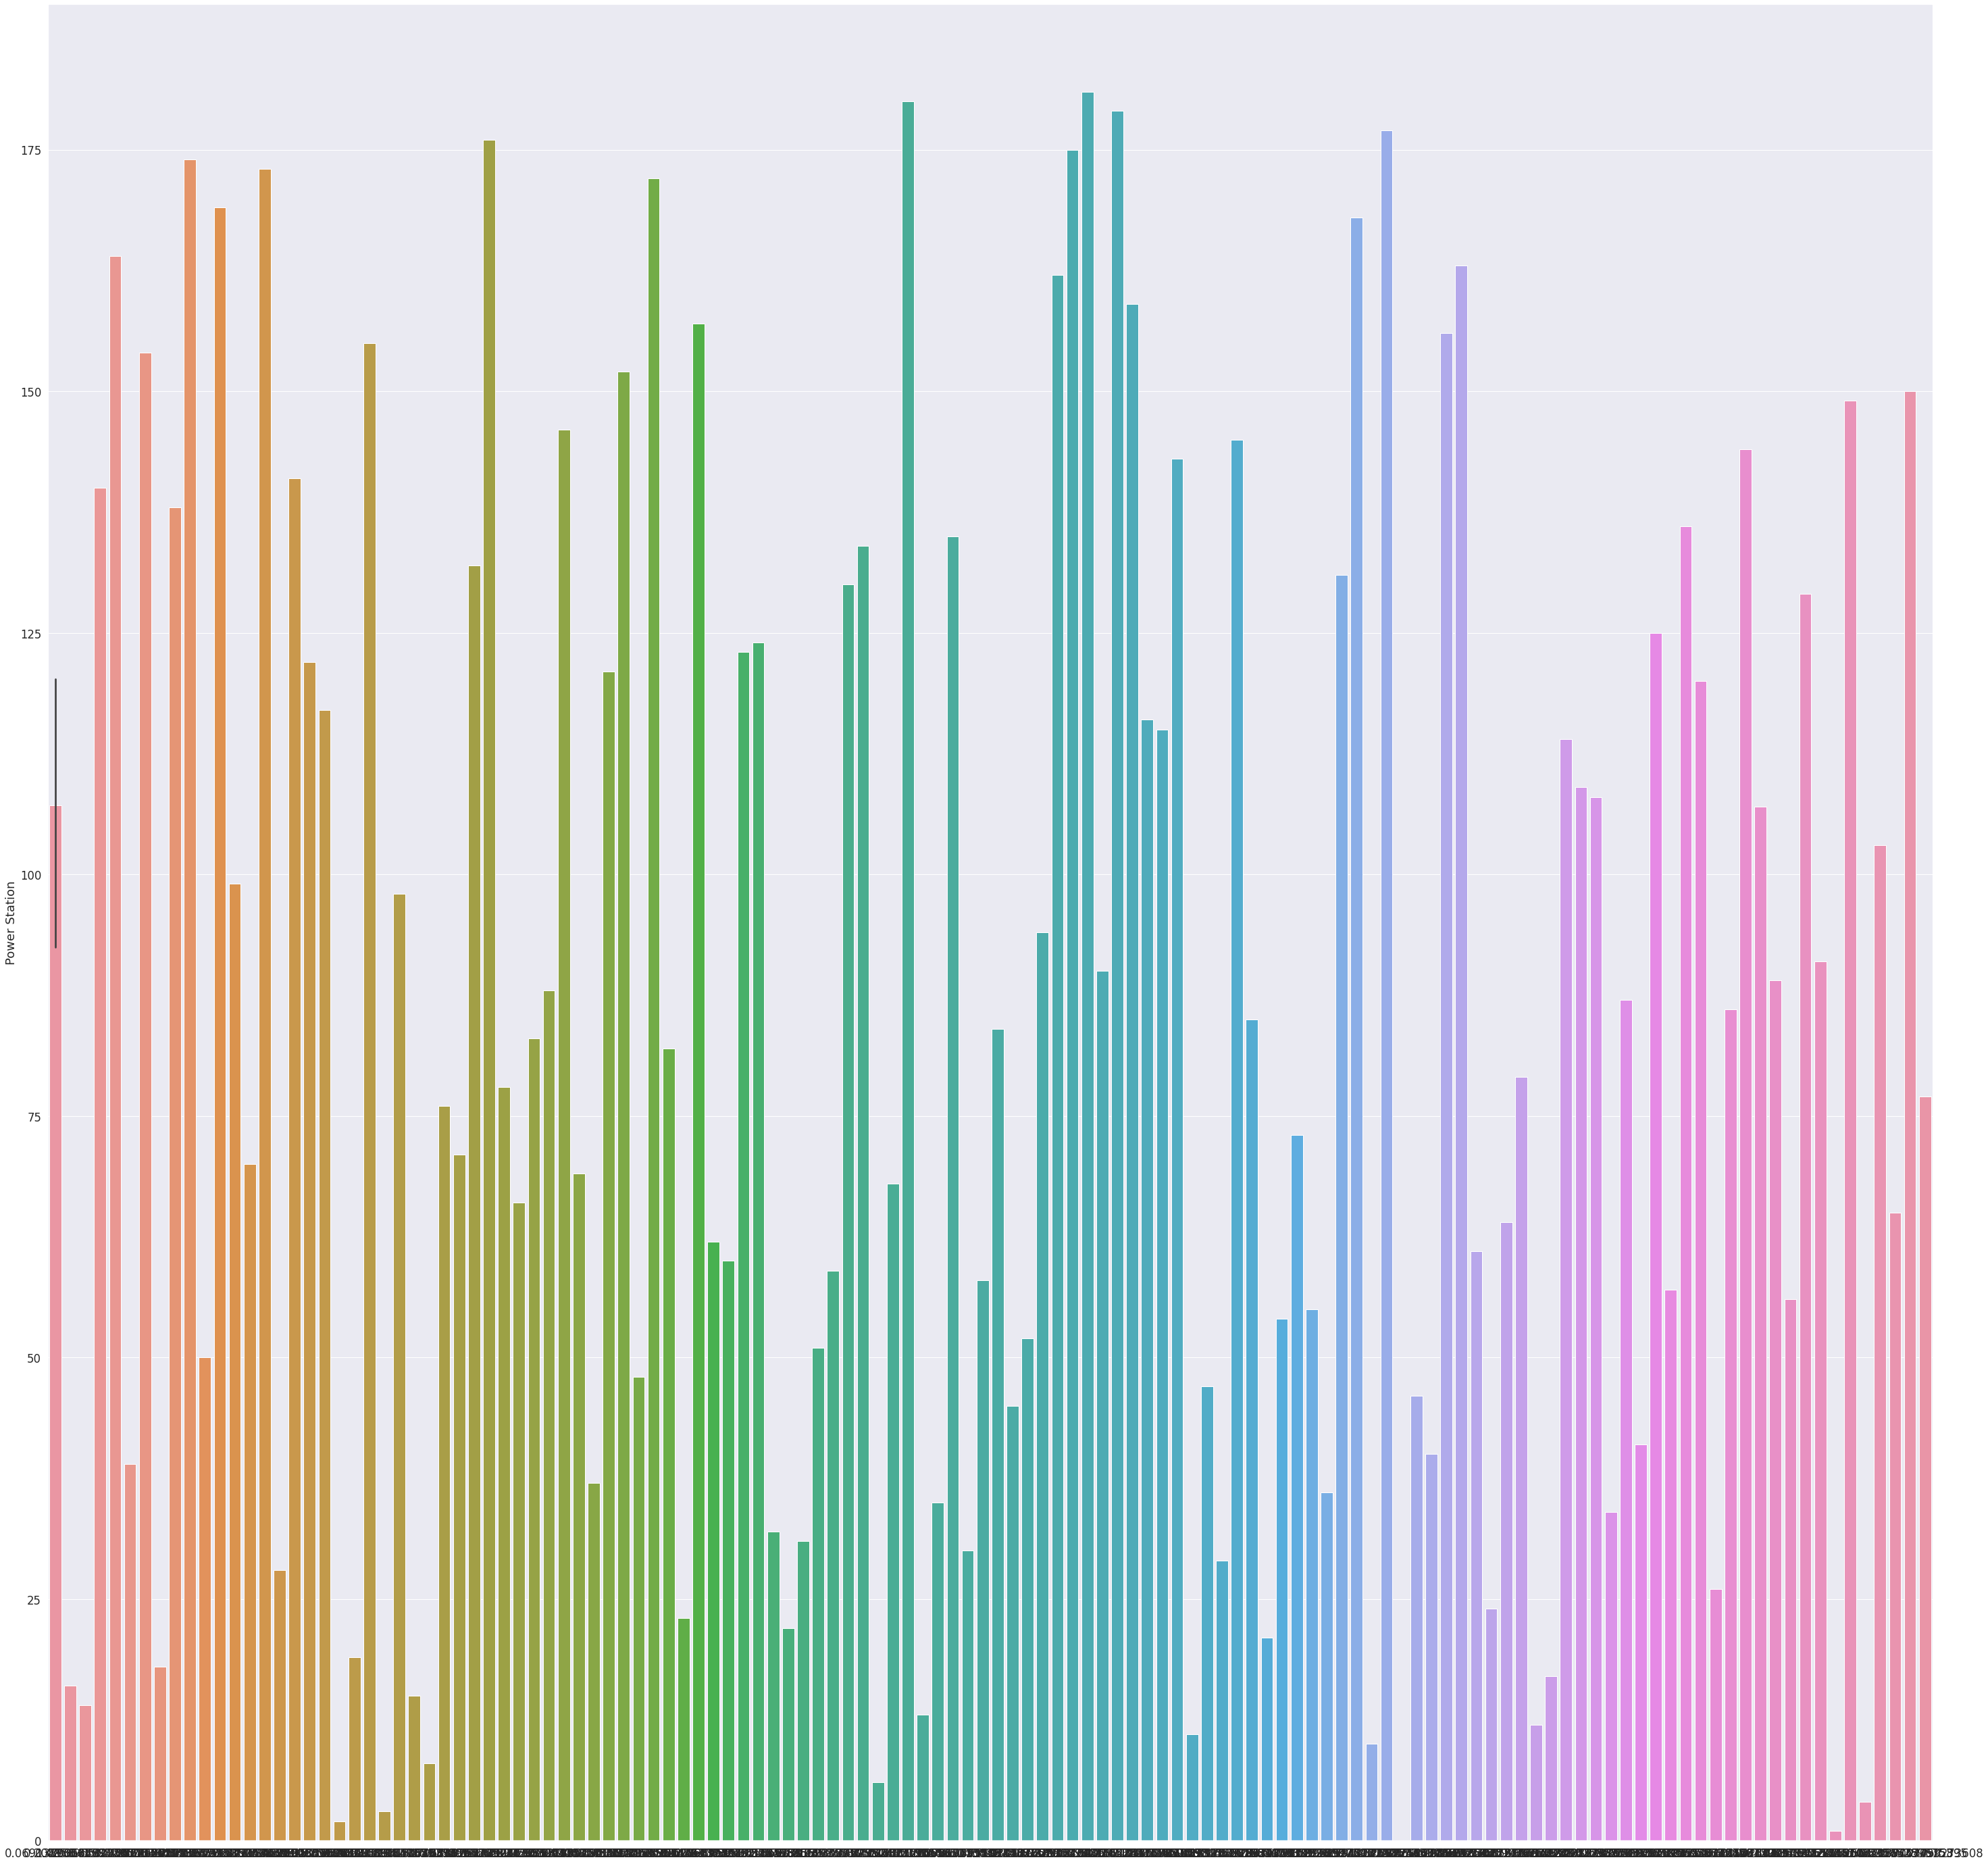

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=d.values,y=d.index)

In [ ]:
e = data.groupby('Power Station')['Other Reasons (MW)'].mean()
e

Power Station
0      32.566135
1       0.000000
2      22.366505
3      58.665977
4       7.961538
         ...    
177     0.000000
178     0.000000
179     0.863487
180     0.000000
181     0.000000
Name: Other Reasons (MW), Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

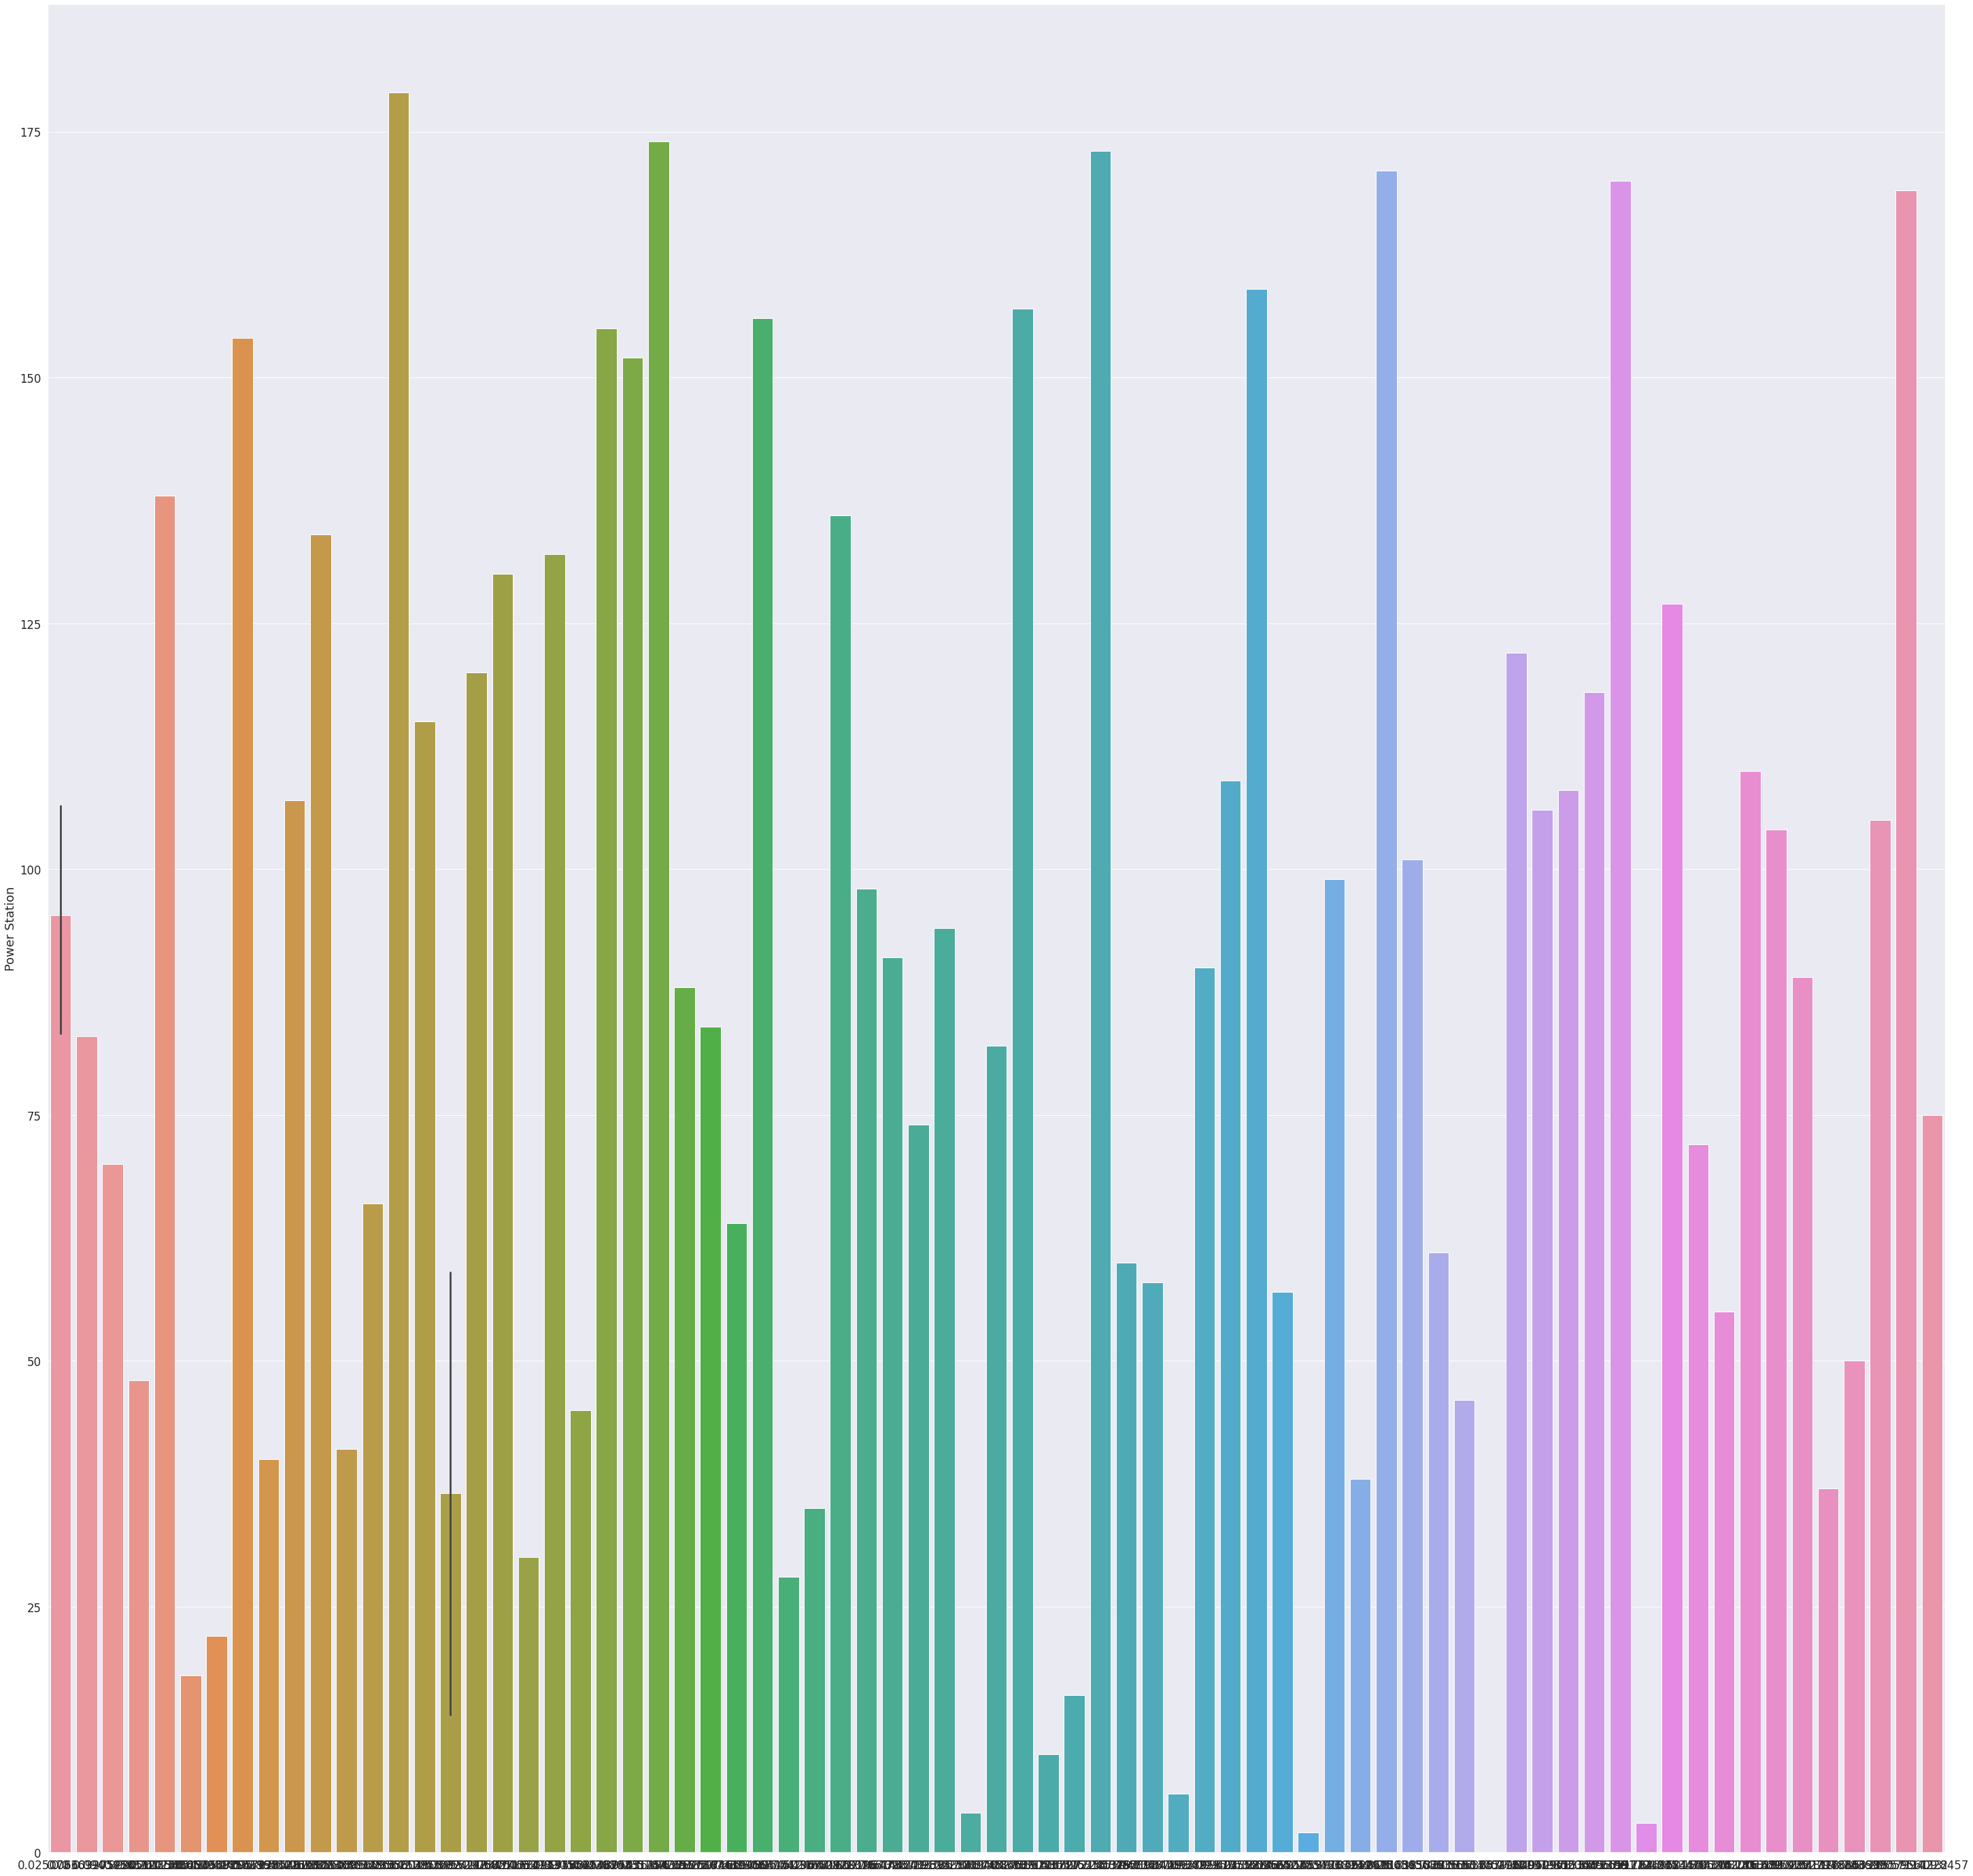

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=e.values,y=e.index)

In [ ]:
f = data.groupby('Power Station')['Programme or Expected(MU)'].mean()
f

Power Station
0      13.800456
1      15.149580
2       5.503236
3       9.928128
4      15.375740
         ...    
177     5.834532
178     1.050987
179     2.085526
180     0.607656
181     7.881095
Name: Programme or Expected(MU), Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

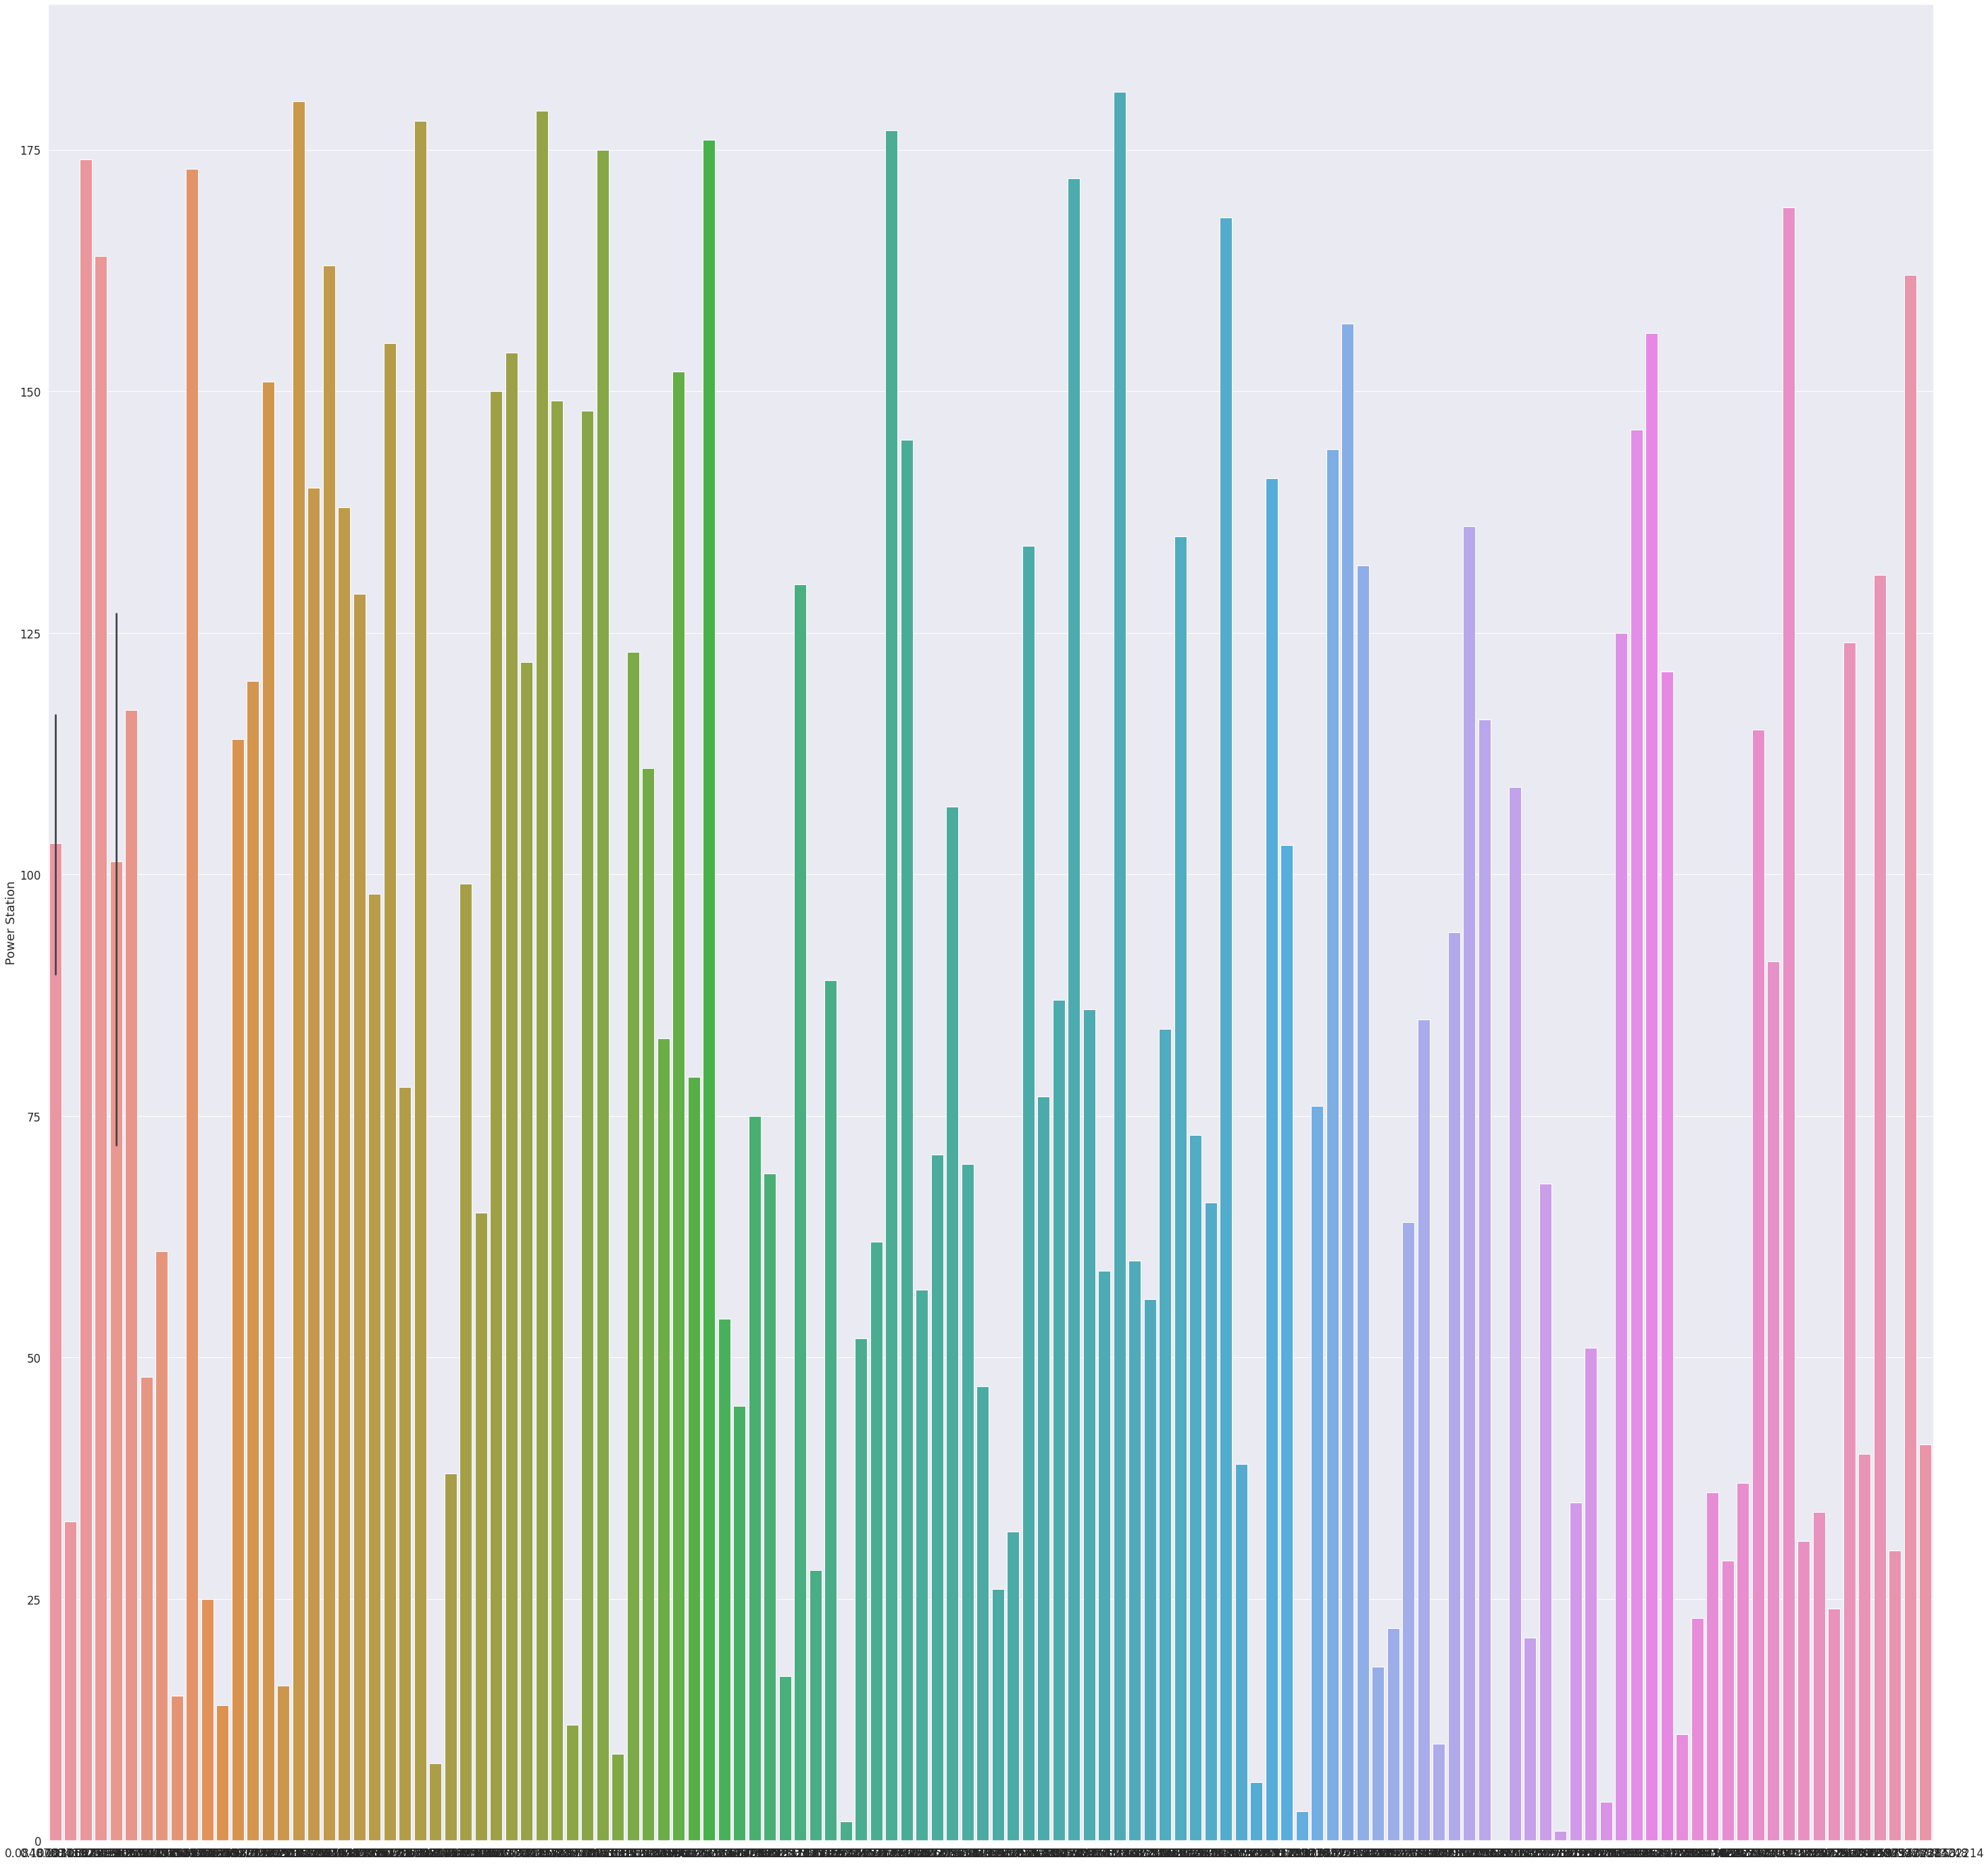

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=f.values,y=f.index)

In [ ]:
g = data.groupby('Power Station')['Actual(MU)'].mean()
g

Power Station
0      14.591790
1      41.218487
2       7.389968
3      13.179938
4      39.846154
         ...    
177    19.129496
178     0.000000
179     1.417763
180     7.023923
181     7.704426
Name: Actual(MU), Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

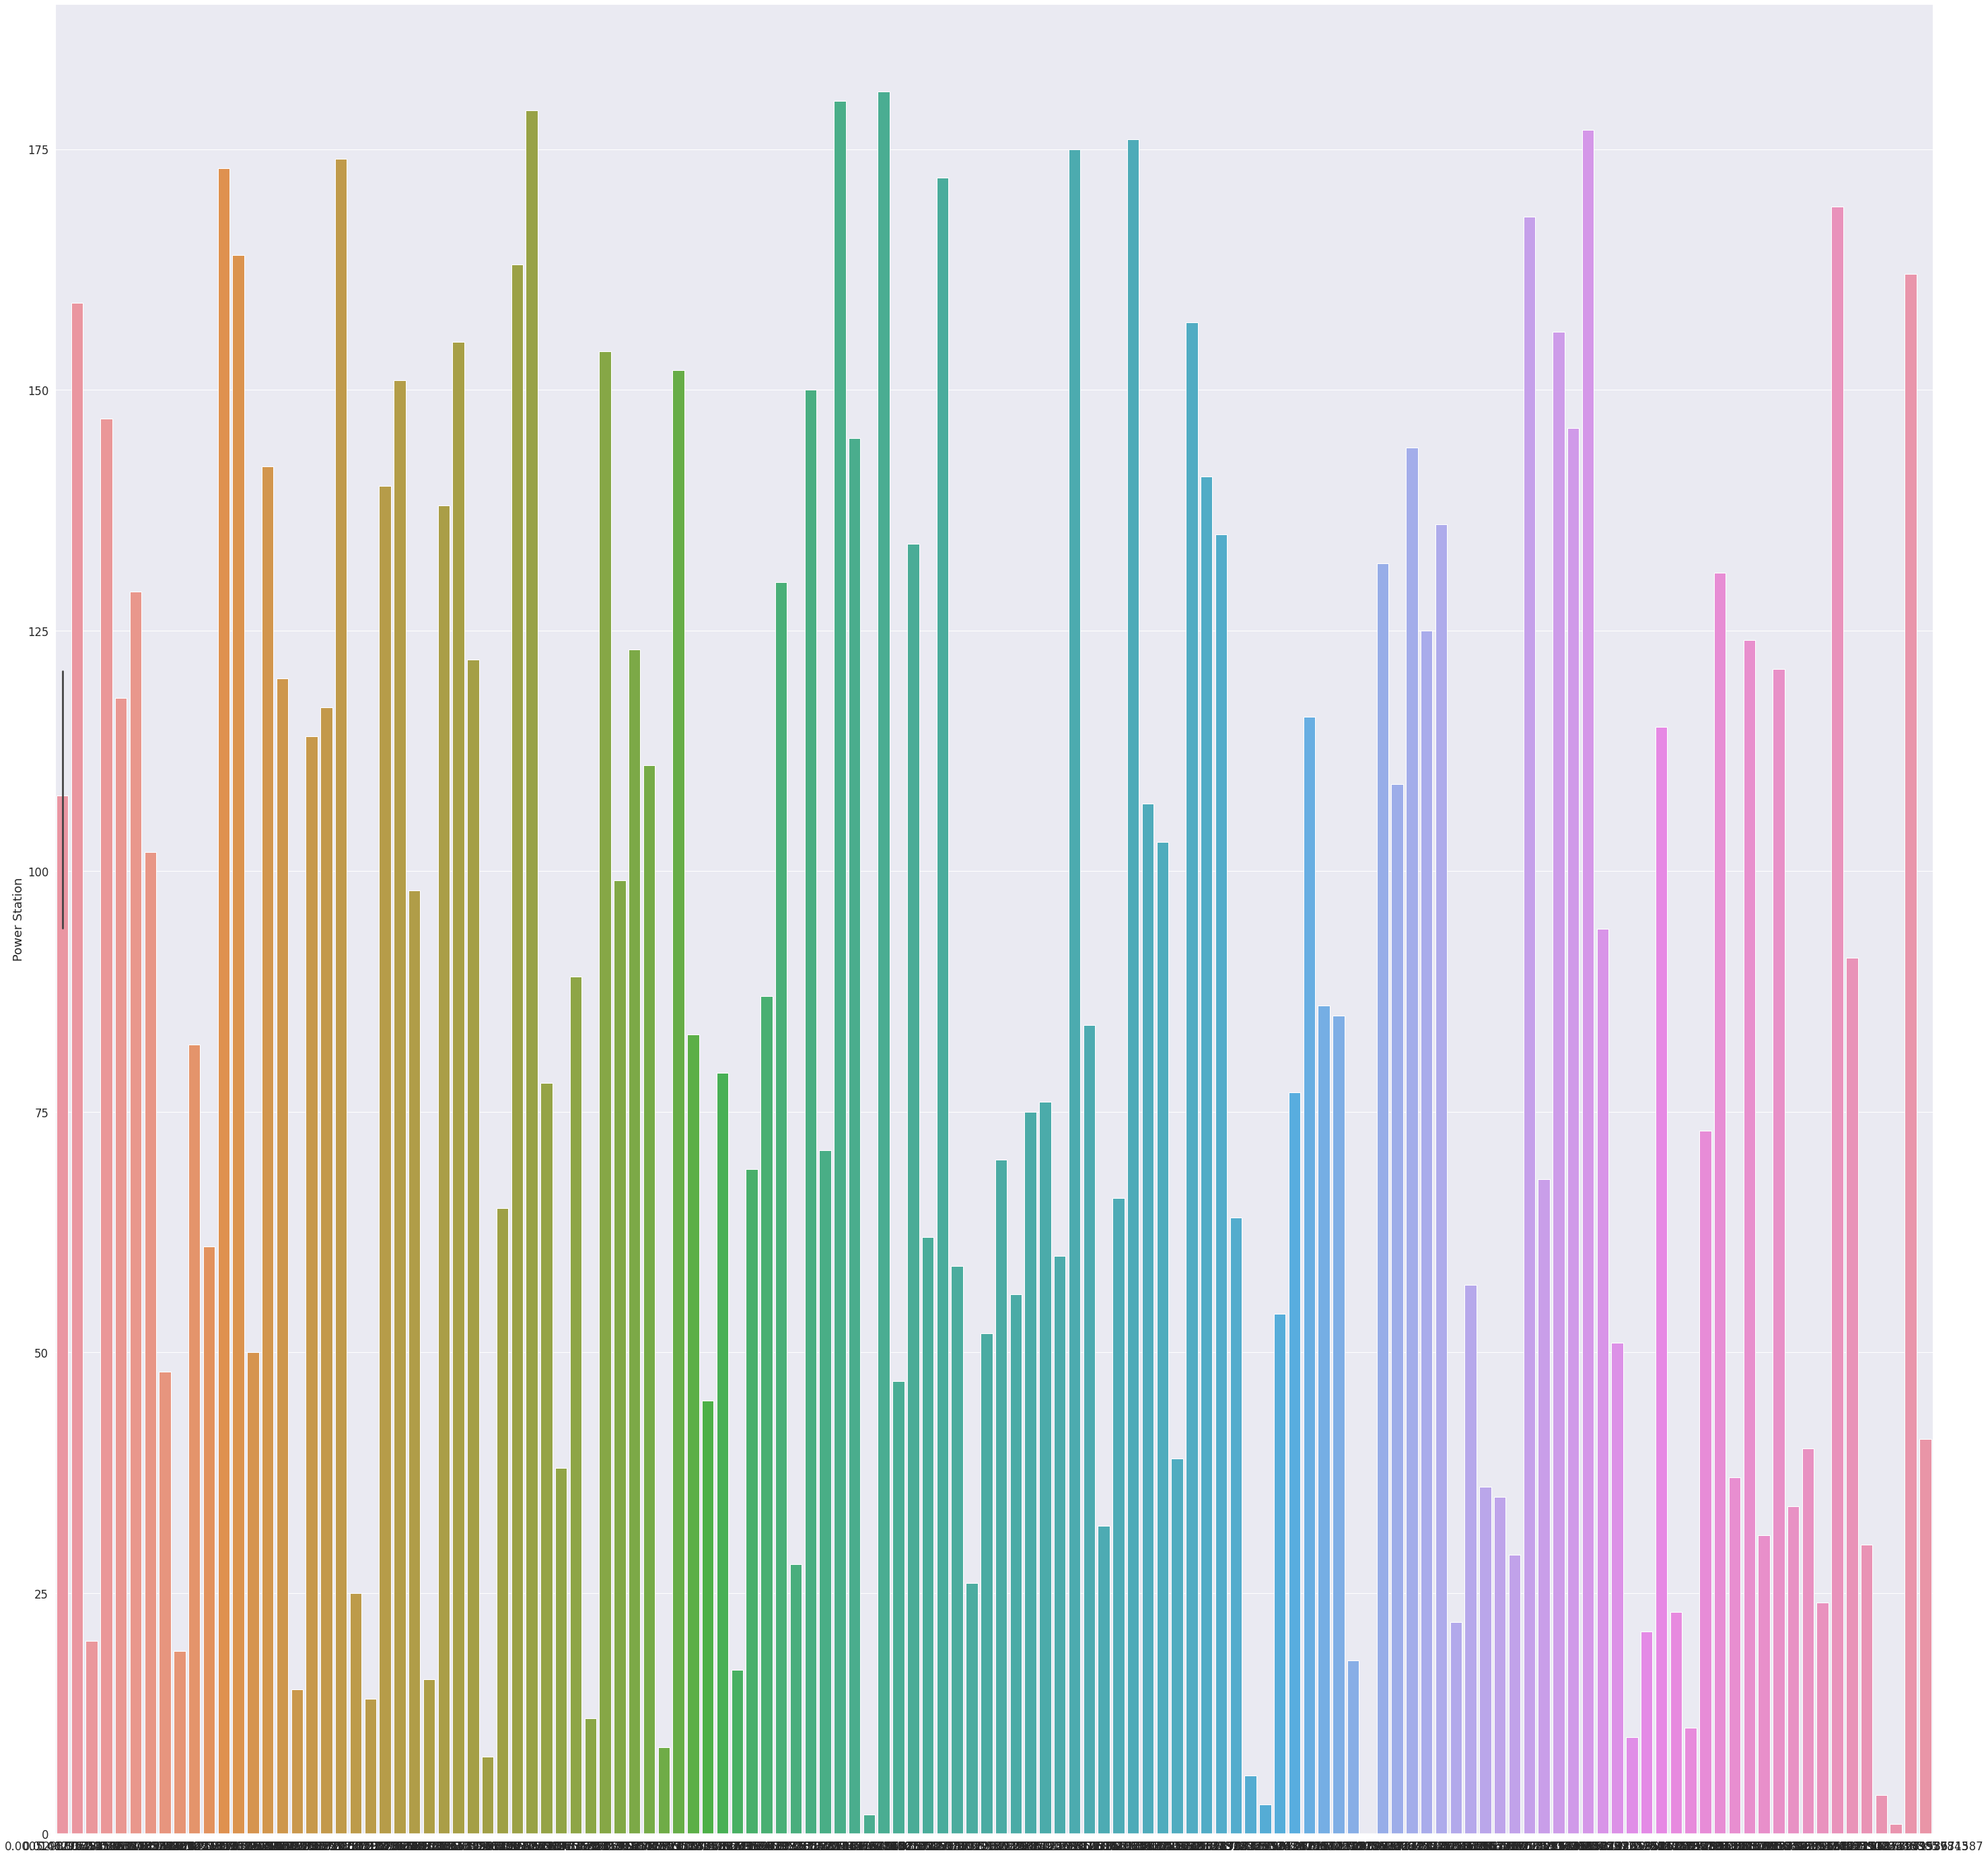

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=g.values,y=g.index)

In [ ]:
h = data.groupby('Power Station')['Excess(+) / Shortfall (-)'].mean()
h

Power Station
0      -0.312799
1      11.117042
2      -0.181294
3       1.057017
4      11.997041
         ...    
177    -0.111295
178    -3.315296
179    -3.222270
180     2.941938
181    -0.229662
Name: Excess(+) / Shortfall (-), Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

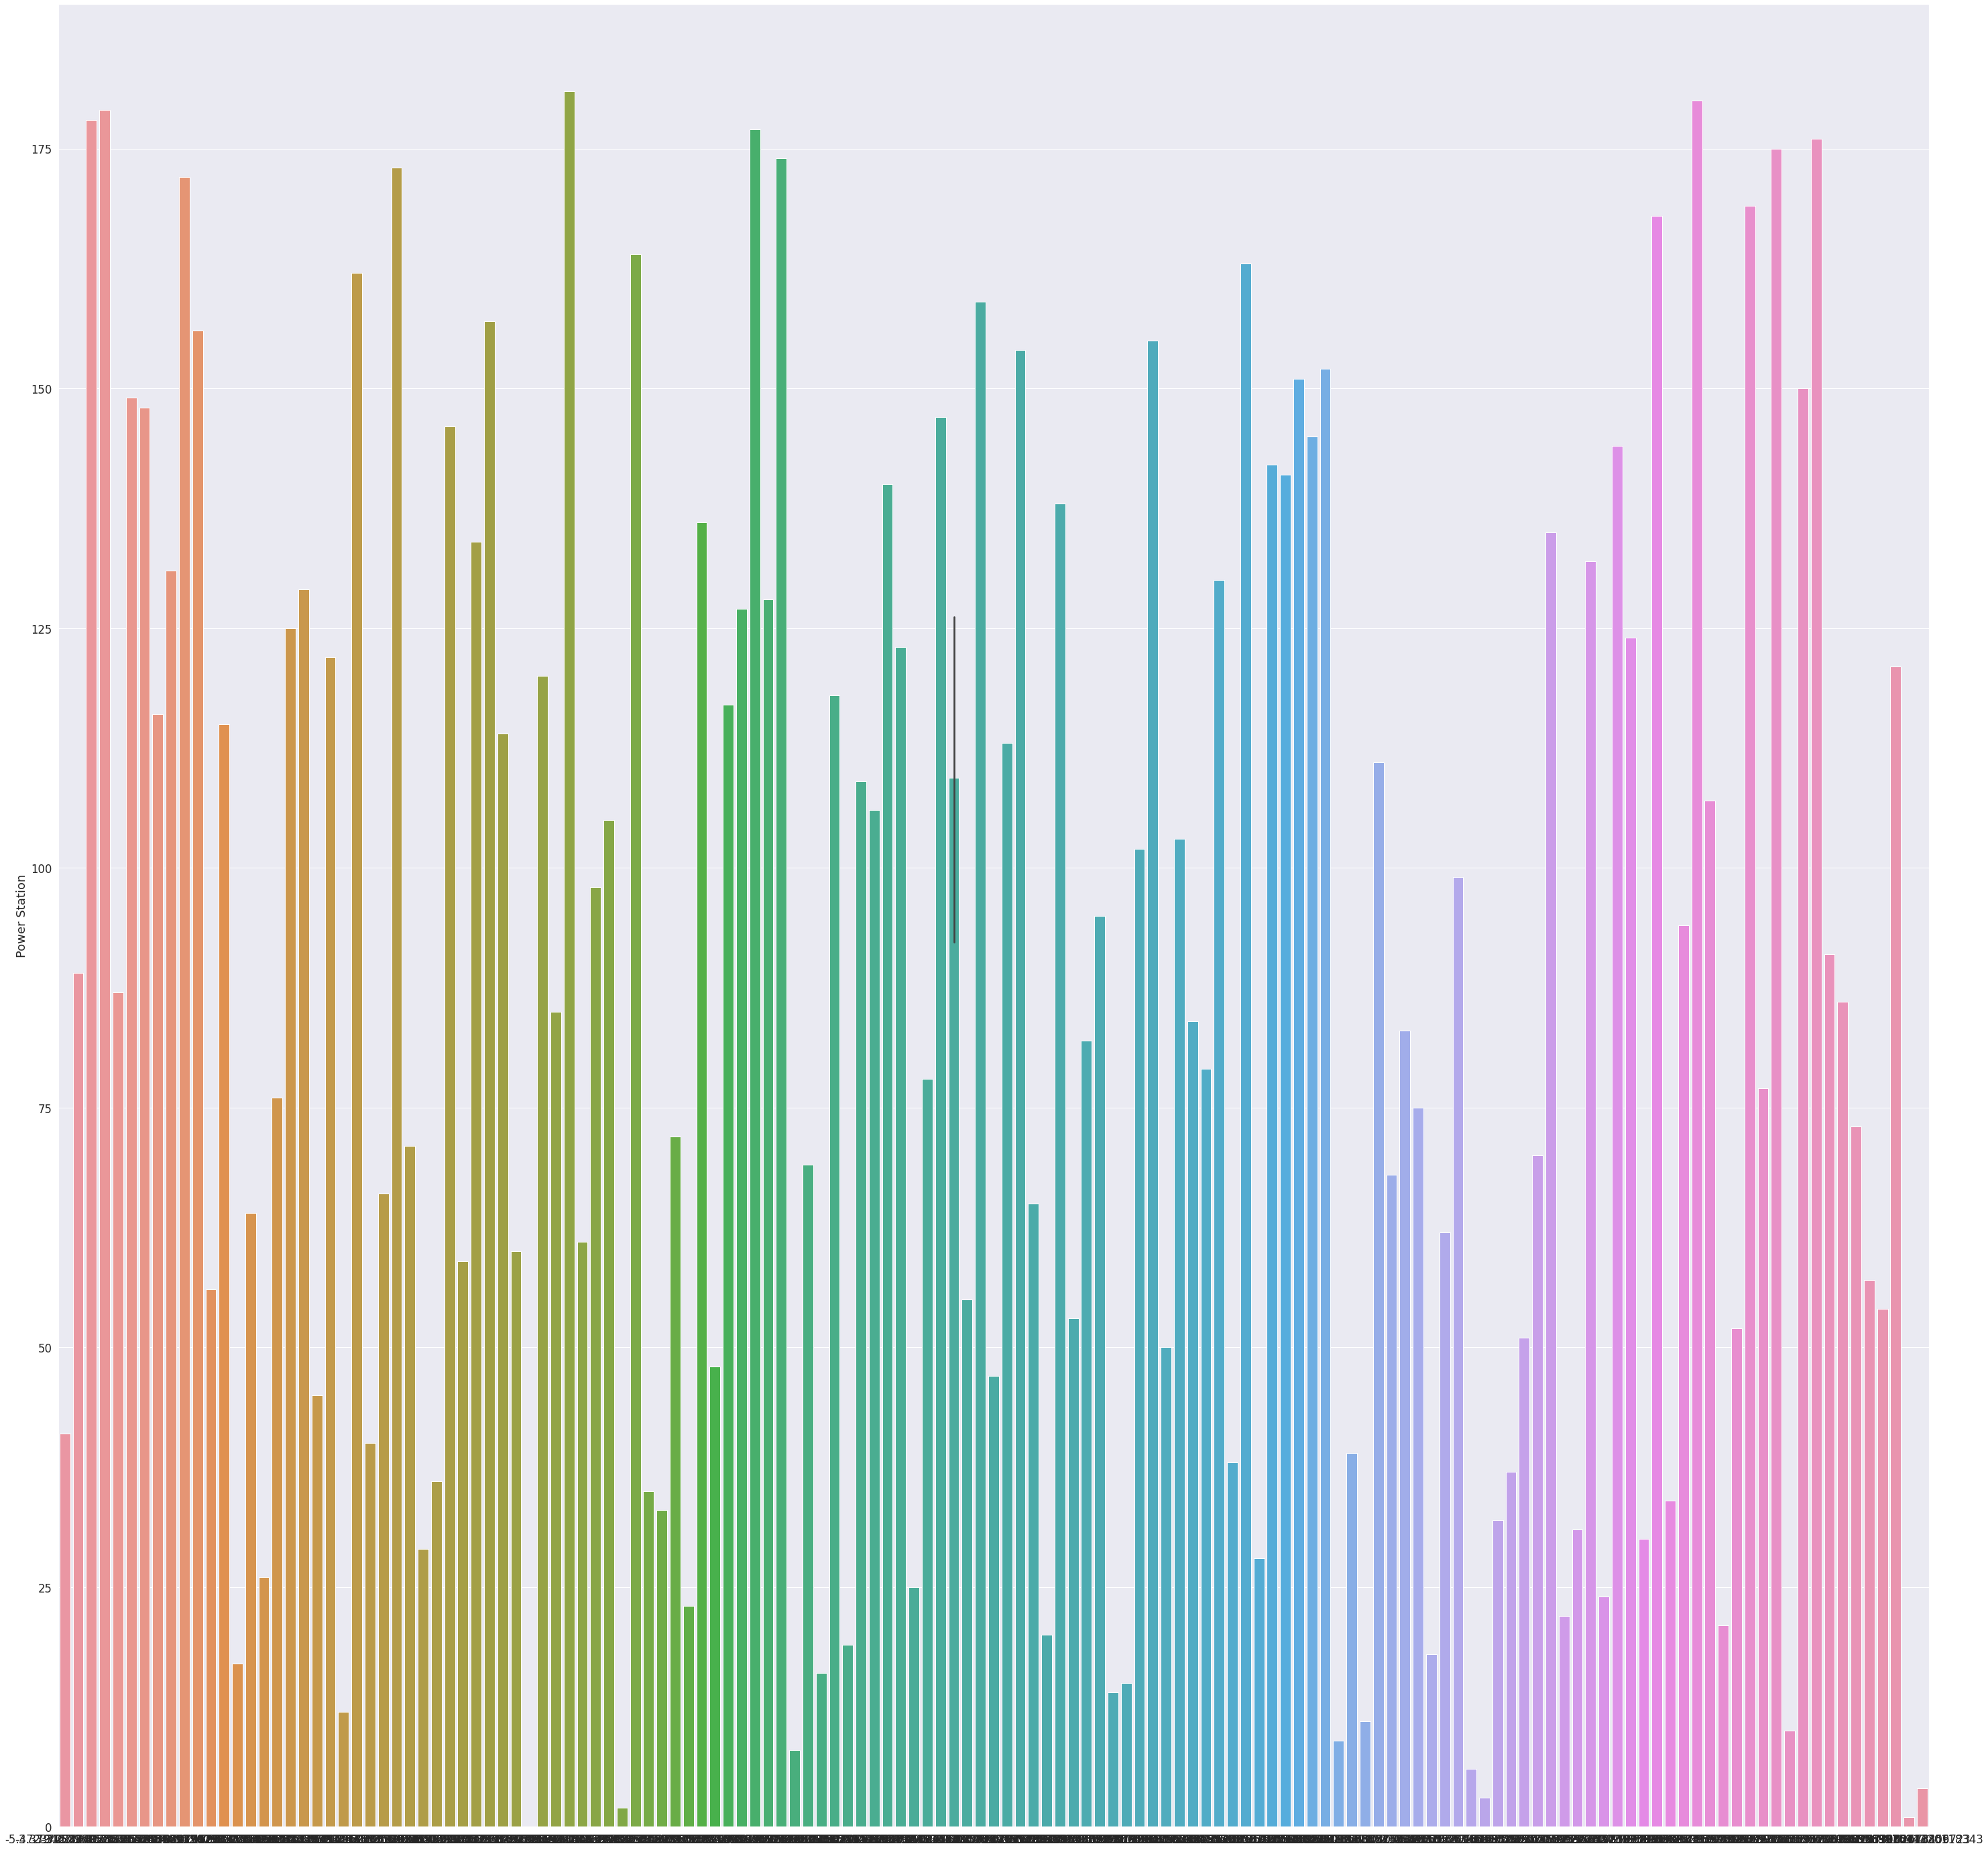

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=h.values,y=h.index)

In [ ]:
i = data.groupby('Power Station')['Deviation'].mean()
i

Power Station
0      0.196505
1      2.079697
2      1.104749
3      1.639137
4      4.466982
         ...   
177   -1.050384
178   -8.059211
179   -7.875296
180    8.715742
181    0.000000
Name: Deviation, Length: 166, dtype: float64

<AxesSubplot:ylabel='Power Station'>

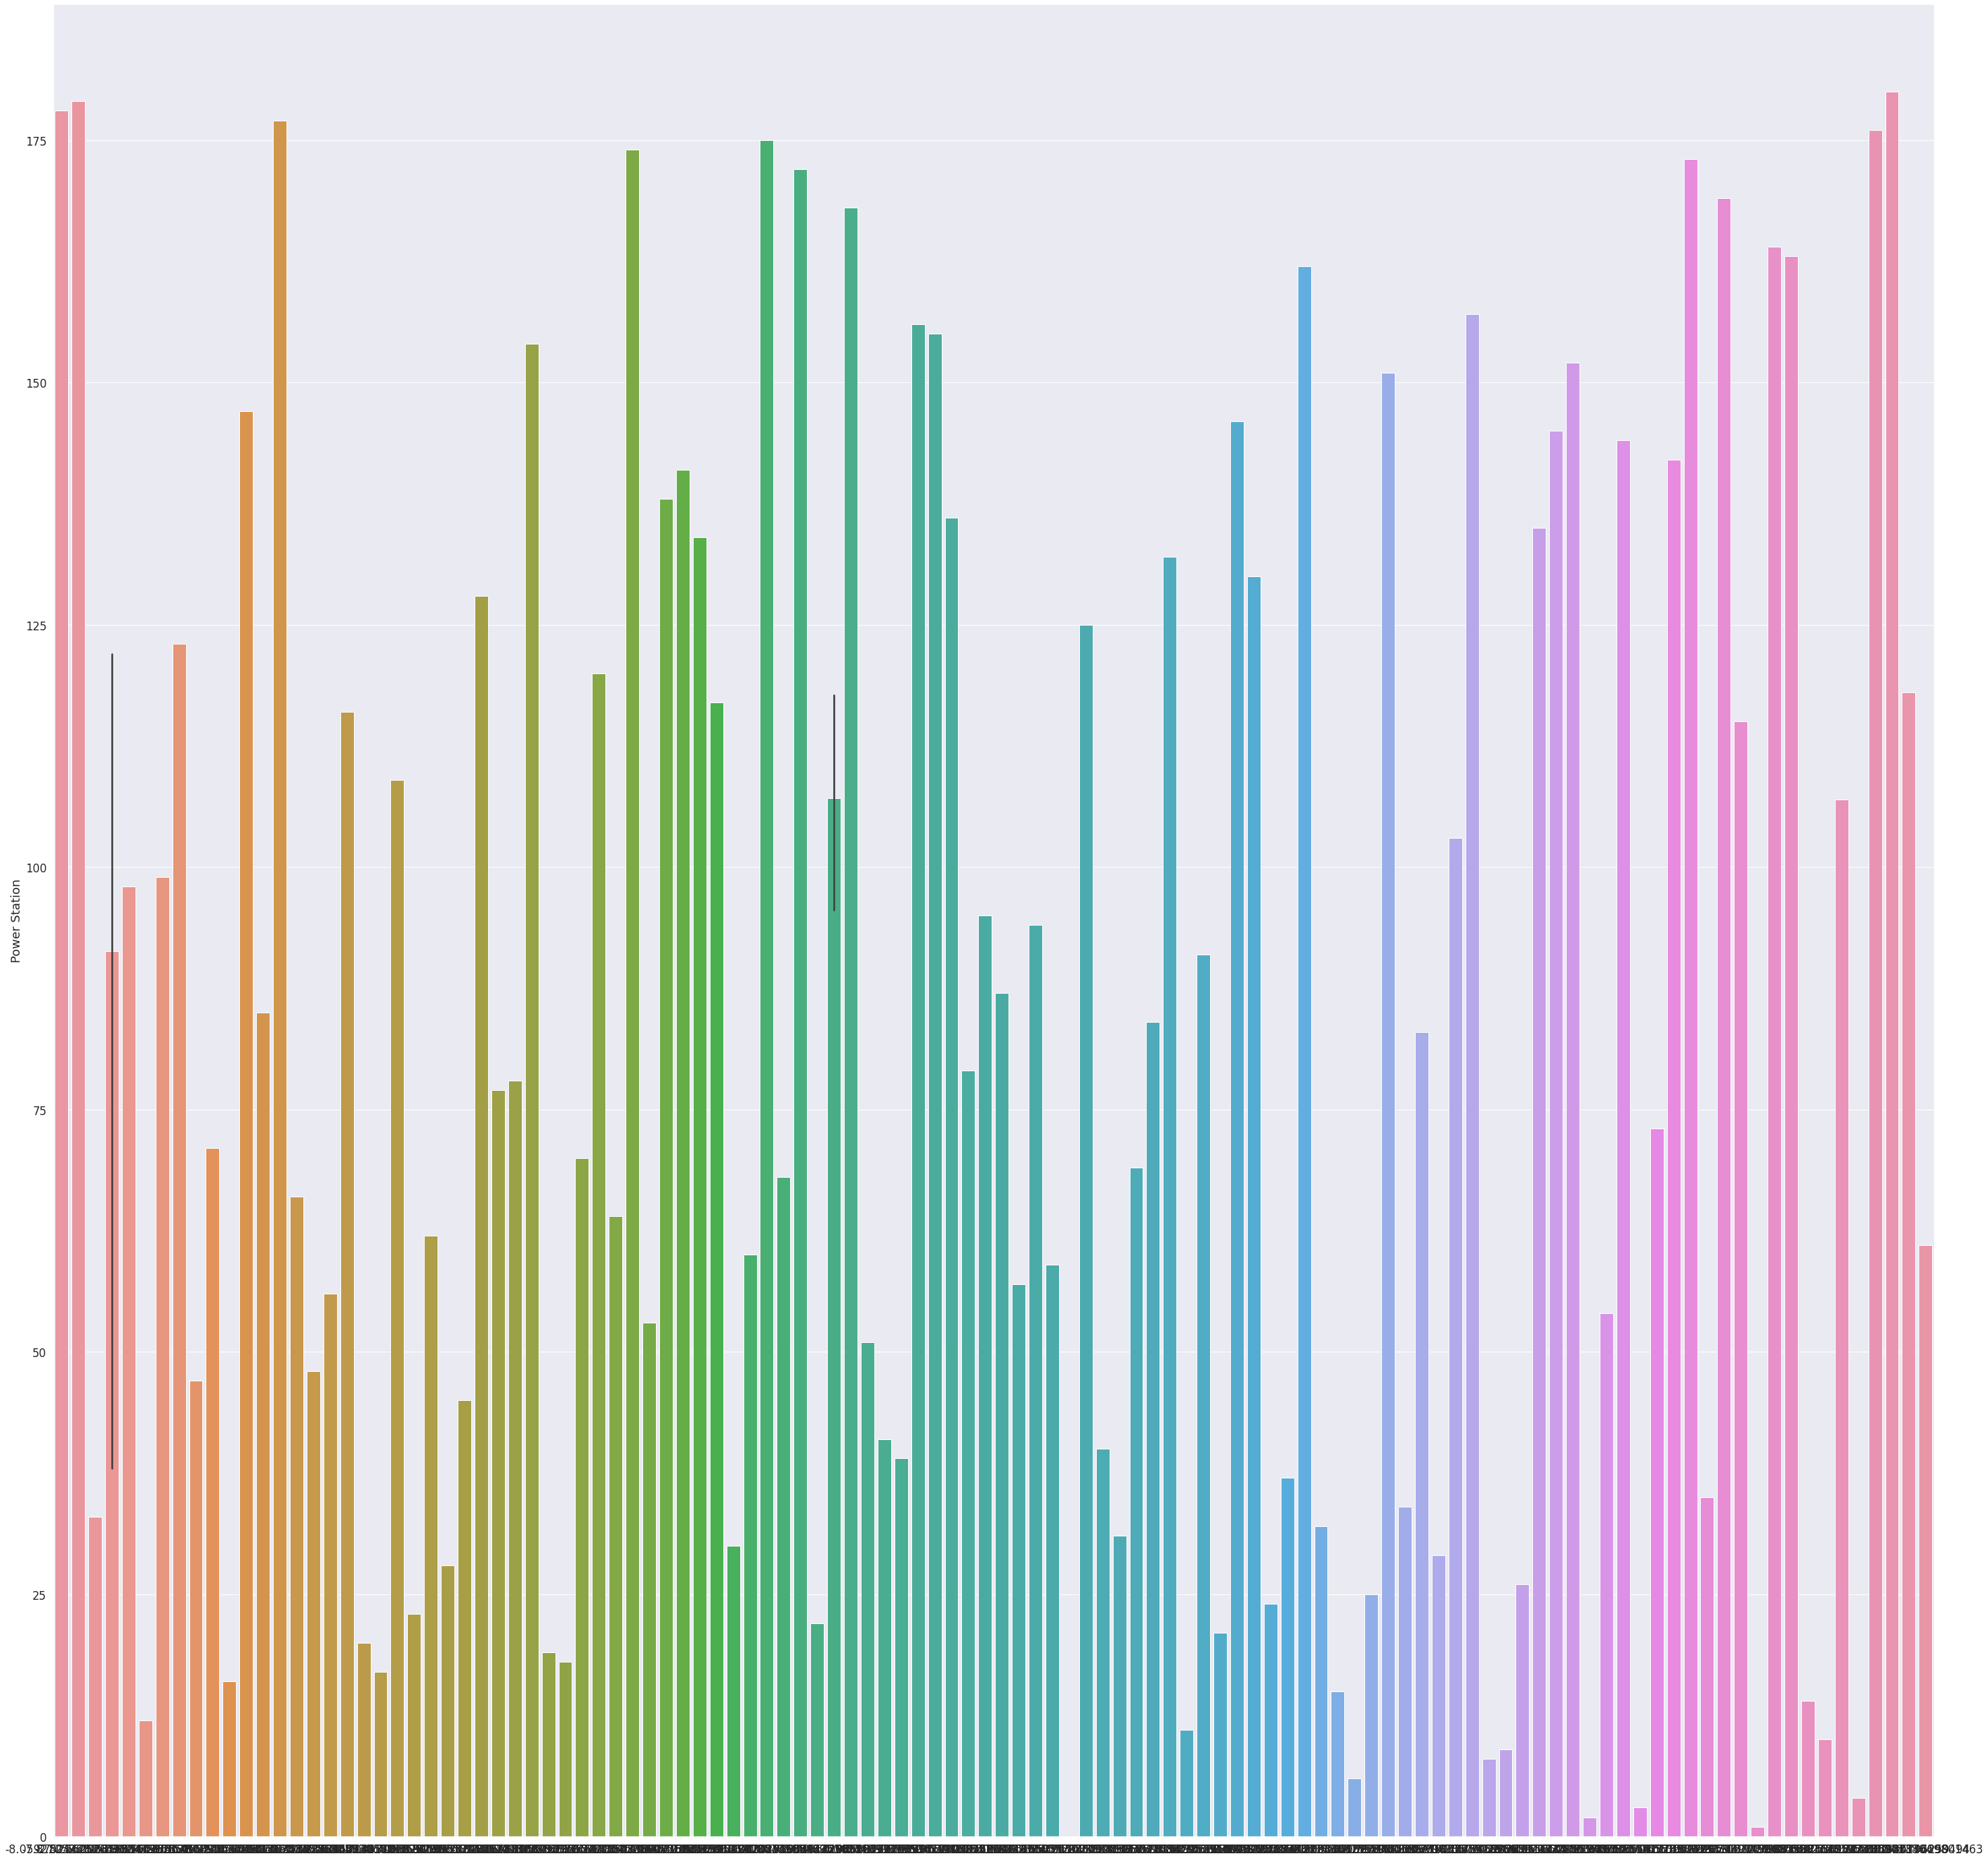

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=i.values,y=i.index)

##Line Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


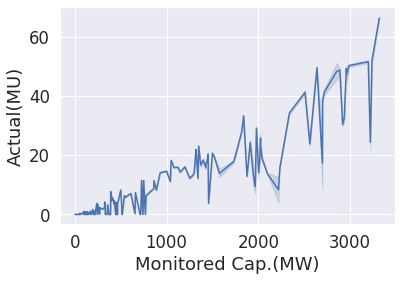

In [ ]:
sns.lineplot('Monitored Cap.(MW)', 'Actual(MU)', data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


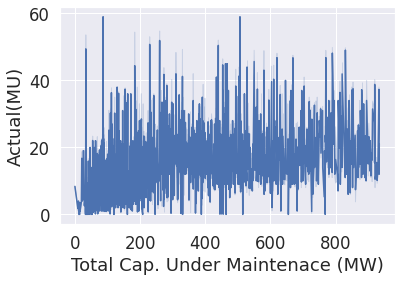

In [ ]:
sns.lineplot('Total Cap. Under Maintenace (MW)', 'Actual(MU)', data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


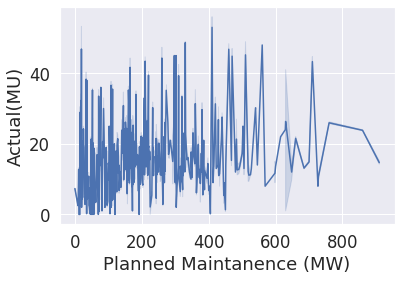

In [ ]:
sns.lineplot('Planned Maintanence (MW)', 'Actual(MU)', data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


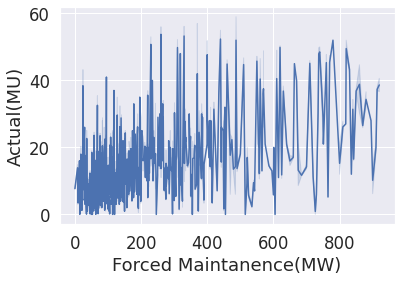

In [ ]:
sns.lineplot('Forced Maintanence(MW)', 'Actual(MU)', data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


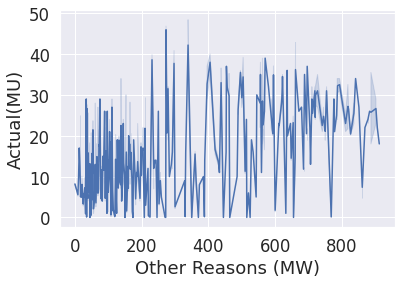

In [ ]:
sns.lineplot('Other Reasons (MW)', 'Actual(MU)', data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


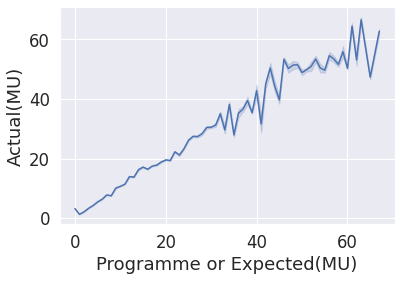

In [ ]:
sns.lineplot('Programme or Expected(MU)', 'Actual(MU)', data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


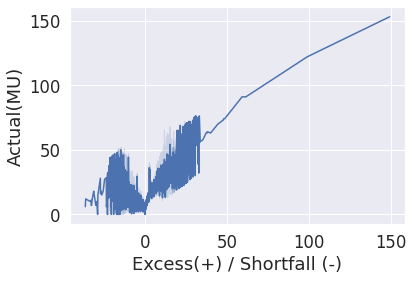

In [ ]:
sns.lineplot('Excess(+) / Shortfall (-)', 'Actual(MU)', data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


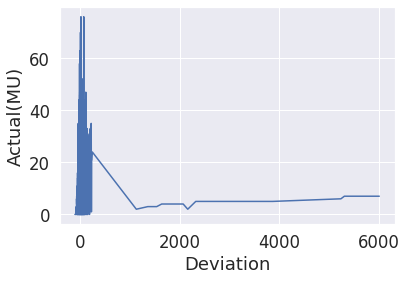

In [ ]:
sns.lineplot('Deviation', 'Actual(MU)', data=data);

##Correlation Plot

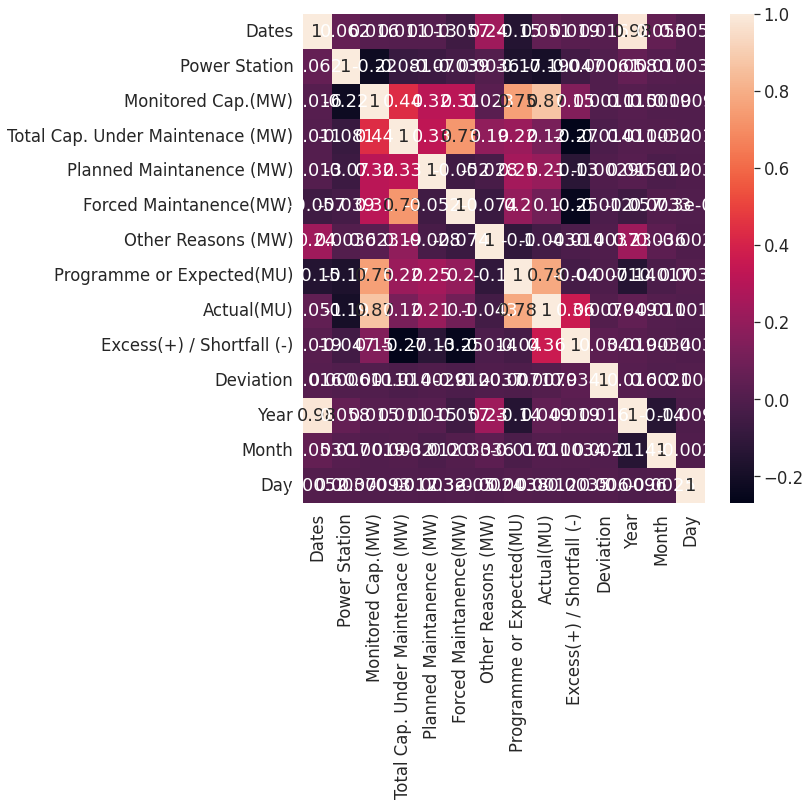

In [ ]:
plt.figure(figsize = (9,9))
ax=sns.heatmap(data.corr(),annot=True)

##Pie Chart

<function matplotlib.pyplot.show(close=None, block=None)>

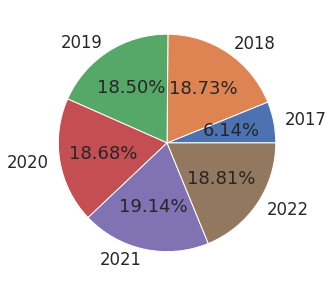

In [ ]:
plt.figure(figsize = (5,5))

i = data.groupby("Year")["Actual(MU)"].count()
i

plt.pie(i, labels=i.index, autopct="%.2f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

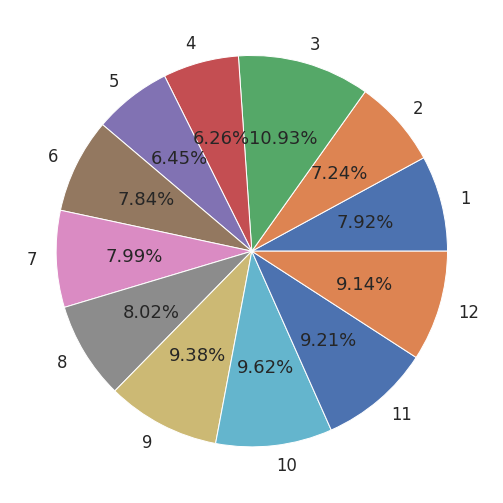

In [ ]:
plt.figure(figsize = (9,9))

j = data.groupby("Month")["Actual(MU)"].count()
j

plt.pie(j, labels=j.index, autopct="%.2f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

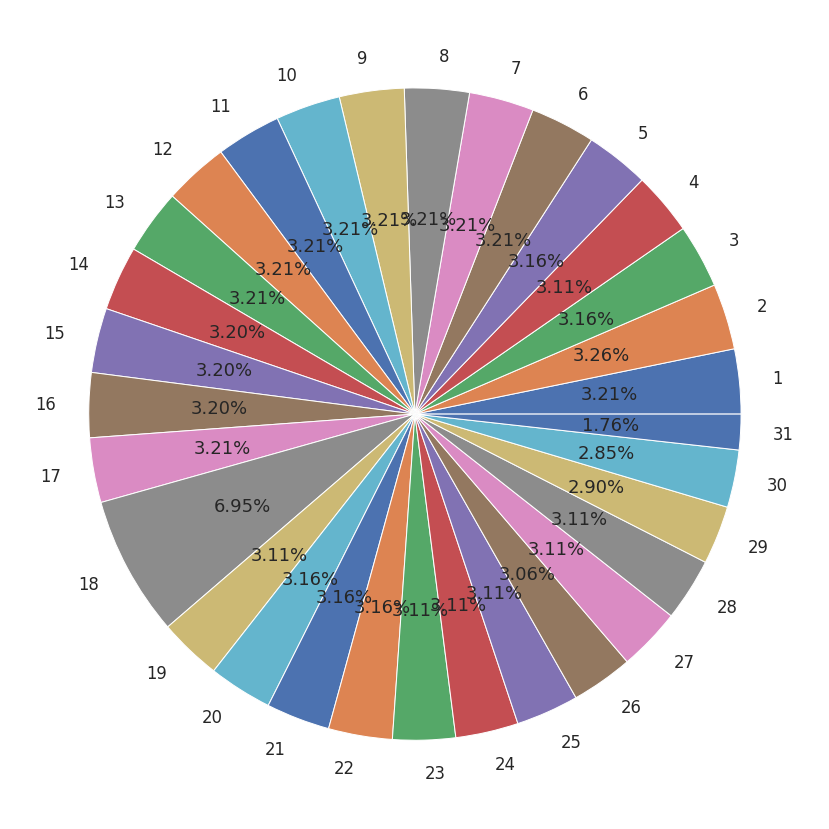

In [ ]:
plt.figure(figsize = (15,15))

k = data.groupby("Day")["Actual(MU)"].count()
k

plt.pie(k, labels=k.index, autopct="%.2f%%")
plt.show

#DUMMIFICATION

In [ ]:
data1 = pd.get_dummies(data, columns=["Power Station"])

In [ ]:
data1.drop('Dates', axis=1, inplace=True)

In [ ]:
data1

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Year,...,Power Station_172,Power Station_173,Power Station_174,Power Station_175,Power Station_176,Power Station_177,Power Station_178,Power Station_179,Power Station_180,Power Station_181
0,2235.40,135.0,0.0,135.0,0,13,18,5.00,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
3,1285.00,150.0,0.0,0.0,0,14,23,9.43,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
6,1252.15,334.0,258.0,76.0,0,19,19,0.11,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
8,192.00,0.0,0.0,0.0,0,2,3,1.05,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
9,330.00,0.0,0.0,0.0,0,6,8,1.37,0.0,2017,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345267,322.00,0.0,0.0,0.0,0,0,3,1.86,0.0,2022,...,0,0,0,0,0,0,0,0,0,0
345268,137.00,32.0,0.0,0.0,32,0,1,0.29,0.0,2022,...,0,0,0,0,0,0,0,0,0,0
345270,105.00,35.0,0.0,35.0,0,0,0,-0.72,0.0,2022,...,0,0,0,0,0,0,0,0,0,0
345271,750.00,250.0,0.0,250.0,0,0,11,4.45,0.0,2022,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(data1.shape[1]):
    print(data1.iloc[:,i].unique())

[2235.4  1285.   1252.15  192.    330.   1500.   1320.    450.    100.
   70.    225.    540.   1300.      0.     24.    400.   1200.   1980.
   86.    108.    250.   1520.   1400.   1080.   1912.02  325.    246.
  600.     45.    655.     34.    515.    120.    660.    270.   1820.
  300.    500.    388.     48.    720.     63.    447.   1430.   1147.5
   35.    135.   2041.46   32.5   119.8   272.     25.2   174.    220.
  464.    768.    860.    445.    742.    716.     36.8   106.   2990.
 1000.     52.8   330.5   105.7   208.    200.    370.     40.05  210.
  550.   2562.25 1125.     96.     99.   1050.    350.    150.    610.
  862.    455.    240.    423.45   36.    322.    169.5  1312.    105.
  726.6  1740.   2720.   1840.   2700.   2220.   2004.5  1040.   3320.
 1370.   1458.    388.45  193.    110.   1342.   2340.    460.    710.
 1452.    358.45 2966.3   428.2    97.   2640.   2016.46 1427.   1440.
  750.   1967.08 2890.   1350.   2856.3    90.   3222.25  777.   2920.3
 270

In [ ]:
for i in range(data1.shape[1]):
    print(data1.iloc[:,i].value_counts())

600.0     21959
0.0       21024
1200.0    19797
300.0      8174
100.0      6249
          ...  
2700.0        6
1577.0        6
2220.0        6
1944.5        5
720.0         4
Name: Monitored Cap.(MW), Length: 155, dtype: int64
0.00      138513
600.00     13870
300.00     11664
220.00      6972
660.00      5571
           ...  
144.18         1
124.18         1
622.50         1
473.00         1
119.08         1
Name: Total Cap. Under Maintenace (MW), Length: 1447, dtype: int64
0.00      255489
250.00      1858
600.00      1191
300.00      1105
150.00      1027
           ...  
430.00         1
241.55         1
413.00         1
70.00          1
102.50         1
Name: Planned Maintanence (MW), Length: 348, dtype: int64
0.00      192027
600.00     12231
300.00     10468
660.00      4440
270.00      4204
           ...  
406.60         1
410.60         1
114.14         1
234.00         1
780.00         1
Name: Forced Maintanence(MW), Length: 525, dtype: int64
0      269066
220       940
48

In [ ]:
data1.shape

(281084, 178)

In [ ]:
data1.isnull().sum()

Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
                                   ..
Power Station_177                   0
Power Station_178                   0
Power Station_179                   0
Power Station_180                   0
Power Station_181                   0
Length: 178, dtype: int64

In [ ]:
print(data['Power Station'].unique())

[  0   3   6   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  29  30  31  33  35  36  37  38  39  40  45  46  47
  48  50  51  52  53  54  55  56  58  59  60  61  62  64  65  66  67  68
  69  70  71  72  74  76  77  78  79  80  82  83  84  85  87  88  89  90
  94  95  98  99 100 101 102 103 104 105 106 108 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134
 135 136 137 138 140 141 142 143 144 145 146 147  28 148 149 150 151 152
 153 154 155 156  32 157  91   1  34  73  75  86 107 109  57 158 159 160
 161 162 163 164   4 167 168   2 169 170 171  41 172 173 174 175 176 177
 178 179 180 181]


In [ ]:
X = data1.drop('Actual(MU)',axis=1)
y = data1['Actual(MU)']

#K-FOLD CLASSIFICATION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)

Monitored Cap.(MW)                  float64
Total Cap. Under Maintenace (MW)    float64
Planned Maintanence (MW)            float64
Forced Maintanence(MW)              float64
Other Reasons (MW)                    int64
                                     ...   
Power Station_177                     uint8
Power Station_178                     uint8
Power Station_179                     uint8
Power Station_180                     uint8
Power Station_181                     uint8
Length: 177, dtype: object
int64


In [ ]:
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

In [ ]:
linreg=LinearRegression()
cv = KFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
scores = cross_val_score(linreg, X, y, scoring='neg_mean_absolute_error')

In [ ]:
mean(absolute(scores))

484076501.2183763

#LINEAR REGRESSION

In [ ]:
lm=LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm1.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

2.5914944334077794
0.9471551341996246


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

1.519240913147756

In [ ]:
print(lm1.intercept_)
print(lm1.coef_)

-859.4102075837764
[ 1.42073804e-02 -6.24424387e-03 -3.08359863e-03 -1.74558605e-03
  6.27510939e-04  2.24069293e-01  5.80730650e-01 -4.52788213e-04
  4.24261940e-01  6.51876922e-02  1.32354576e-03 -1.17945165e+01
  5.98452595e-01 -2.95928231e+00 -3.85080729e+00 -3.46797113e+00
 -3.32070914e+00  5.97943514e-01  4.62764068e-02 -2.69083411e+00
  2.84702440e+00  2.95572921e-01  1.39020796e+00  1.13392599e+00
  1.39161064e+00  2.30547719e-01  8.00721246e-01 -4.72110849e+00
  1.83908814e+00  1.54010287e+00  6.50385653e-01 -2.65520845e-02
  3.76333740e+00 -5.85539197e-01  1.24333749e+00  8.98167258e-01
  1.87374868e+00  4.91916887e-01  2.61707127e+00  6.28364230e+00
  3.83734393e+00  5.47591009e-01  2.25126083e+00 -1.24289771e+00
  7.62680962e-01  2.58603407e+00 -2.43458228e+00  4.90902761e-01
 -8.58198313e+00  5.90936139e-01  5.48734708e+00  2.10934257e+00
  4.13834772e-01  1.15448199e+00  1.44241987e+00 -4.07364766e+00
  2.00527356e+00  2.56659583e-01  1.54769237e+00 -5.94543316e+00
 -1.80

#BAGGING

##BAGGING REGRESSION

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
br_param_grid = {'n_estimators' : [100,500,1000,1500,2000,2500,3000,3500]}

In [ ]:
clf = BaggingRegressor()
br_grid_search = GridSearchCV(clf, br_param_grid,cv=5)
br_grid_search.fit(X_train, y_train)

In [ ]:
best_br_params = br_grid_search.best_params_
best_br_score = br_grid_search.best_estimator_

In [ ]:
print("Grid Search Results:")
print("Best Bagging Parameters: ", best_br_params)
print("Best Bagging Score: ", best_br_score)

In [ ]:
bagging=BaggingRegressor(n_estimators=,random_state=42)

In [ ]:
a=bagging.fit(X_train, y_train)

In [ ]:
y_pred = a.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

0.427409446191976
0.9985625575327882


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.12818320081114254

##DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
 dr_param_grid ={"max_depth" : [1,3,5,7,9,11,12],
                "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [ ]:
tree = DecisionTreeRegressor()
dr_grid_search = GridSearchCV(tree, dr_param_grid,cv=5)
dr_grid_search.fit(X_train, y_train)

In [ ]:
best_dr_params = dr_grid_search.best_params_
best_dr_score = dr_grid_search.best_estimator_

In [ ]:
print("Grid Search Results:")
print("Best Decision Tree Parameters: ", best_dr_params)
print("Best Decision Tree Score: ", best_dr_score)

In [ ]:
decision=DecisionTreeRegressor(max_depth=,min_samples_leaf=,min_weight_fraction_leaf=,max_features=,max_leaf_nodes=,random_state=42)

In [ ]:
b = decision.fit(X_train, y_train)

In [ ]:
y_pred = b.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

4.934665732796934
0.8074840824180001


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

2.927443991661453

##RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

In [ ]:
rf_model = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

In [ ]:
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

In [ ]:
print("Grid Search Results:")
print("Best Random Forest Parameters: ", best_rf_params)
print("Best Random Forest Score: ", best_rf_score)

In [ ]:
random=RandomForestRegressor(n_estimators=,max_depth=,min_samples_split=,random_stae=42)

In [ ]:
c = random.fit(X_train, y_train)

In [ ]:
y_pred = c.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

0.2881362620709702
0.9990862444107645


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.10321313962166974

#BOOSTING

##ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ab_param_grid = {'n_estimators' : [100,500,1000,1500,2000,2500,3000,3500],
                'learning_rate': [0.01,0.02,0.03,0.04,0.5,0.6,0.7,0.8,0.9]}

In [ ]:
adaboost = AdaBoostRegressor()
ab_grid_search = GridSearchCV(adaboost, ab_param_grid, cv=5)
ab_grid_search.fit(X_train, y_train)

In [ ]:
best_ab_params = ab_grid_search.best_params_
best_ab_score = ab_grid_search.best_score_

In [ ]:
print("Grid Search Results:")
print("Best ADA Boost Parameters: ", best_ab_params)
print("Best ADA Boost Score: ", best_ab_score)

In [ ]:
ada=AdaBoostRegressor(n_estimators=,learning_rate=,random_state=42)

In [ ]:
d = ada.fit(X_train, y_train)

In [ ]:
y_pred=d.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

4.330883718401793
0.8517126134040158


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

2.786125237920707

##GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_param_grid={'learning_rate': [0.01,0.02,0.03,0.04,0.5,0.6,0.7,0.8,0.9],
                    'subsample'    : [0.9, 0.5, 0.2, 0.1,0.3,0.4,0.6,0.8,0.7],
                    'n_estimators' : [100,500,1000,1500,2000,2500,3000,3500],
                    'max_depth'    : [4,6,8,10]}

In [ ]:
grad_boost= GradientBoostingRegressor()
gb_grid_search = GridSearchCV(grad_boost, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

In [ ]:
best_gb_params = gb_grid_search.best_params_
best_gb_score = gb_grid_search.best_score_

In [ ]:
print("Grid Search Results:")
print("Best Gradient Boost Parameters: ", best_gb_params)
print("Best Gradient Boost Score: ", best_gb_score)

In [ ]:
gradient=GradientBoostingRegressor(learning_rate=,subsample=,n_estimators=,max_depth=,random_state=42)

In [ ]:
e = gradient.fit(X_train, y_train)

In [ ]:
y_pred=e.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

1.1076270585632095
0.990300747218838


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.5685874024355384

##XGBOOST

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb_param_grid={'learning_rate': [0.01,0.02,0.03,0.04,0.5,0.6,0.7,0.8,0.9],
               'n_estimators' : [100,500,1000,1500,2000,2500,3000,3500],
               'max_depth'    : [4,6,8,10],
               'gamma': [0.01,0.1]}

In [ ]:
xgb_boost=xgb.XGBRegressor()
xgb_grid_search = GridSearchCV(xgb_boost, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

In [ ]:
best_xgb_params = xgb_grid_search.best_params_
best_xgb_score = xgb_grid_search.best_score_

In [ ]:
print("Grid Search Results:")
print("Best XGBoost Parameters: ", best_xgbb_params)
print("Best XGBoost Score: ", best_xgb_score)

In [ ]:
xgb=xgb.XGBRegressor(learning_rate,n_estimators,max_depth,gamma=,random_state=42)

In [ ]:
f = xgb.fit(X_train, y_train)

In [ ]:
y_pred=f.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

1.020871438218584
0.9917606439358738


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.5011921853675358

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_param_grid={'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
model=KNeighborsClassifier()
knn_grid_search = GridSearchCV(model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

In [ ]:
best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

In [ ]:
print("Grid Search Results:")
print("Best KNN Parameters: ", best_knn_params)
print("Best KNN Score: ", best_knn_score)

In [ ]:
knn=KNeighborsClassifier(n_neighbours=,weights=,mtric=,random_state=42)

In [ ]:
g=knn.fit(X_train,y_train)

In [ ]:
y_pred=g.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

8.225870240281832
0.46504792870563494


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

4.023658323994521

#SVM

In [ ]:
from sklearn import svm

In [ ]:
svm_param_grid={'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4],'learning_rate':[0.1,0.2,0.3]}

In [ ]:
cls=svm.SVC()
knn_svm_search = GridSearchCV(cls, svm_param_grid, cv=5)
knn_svm_search.fit(X_train, y_train)

In [ ]:
best_svm_params = svm_grid_search.best_params_
best_svm_score = svm_grid_search.best_score_

In [ ]:
print("Grid Search Results:")
print("Best SVM Parameters: ", best_svm_params)
print("Best SVM Score: ", best_svm_score)

In [ ]:
svm=svm.SVC(kernel=,degree=,learning_rate=,random_state=42)

In [ ]:
h=svm.fit(X_train,y_train)

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

13.814479176768788
-0.5087601223510305


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

8.021968443709198